In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import scipy
import itertools

In [2]:
file = r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Untitled Folder\1997-01-01-2009-12-31-Somalia.csv"
df = pd.read_csv(file, sep=';')

In [11]:
df

event_id_cnty  year  date_timestamp  time_precision  \
event_date                                                       
1997-02-15      SOM28750  1997    8.559612e+08               3   
1997-02-15      SOM28750  1997    8.559612e+08               3   
1997-03-31          SOM1  1997    8.597592e+08               1   
1997-03-31          SOM1  1997    8.597592e+08               1   
1997-04-21          SOM2  1997    8.615736e+08               1   
...                  ...   ...             ...             ...   
2009-12-10       SOM5577  2009    1.260400e+09               1   
2009-12-26       SOM5578  2009    1.261782e+09               2   
2009-12-26       SOM5578  2009    1.261782e+09               2   
2009-12-27      SOM28821  2009    1.261868e+09               1   
2009-12-27      SOM28821  2009    1.261868e+09               1   

                 disorder_type                  event_type  \
event_date                                                   
1997-02-15  Political violence  Violence against civilians   
1997-02-15  Political violence  Violence against civilians   
1997-03-31  Political violence                     Battles   
1997-03-31  Political violence                     Battles   
1997-04-21  Political violence  Violence against civilians   
...                        ...                         ...   
2009-12-10      Demonstrations                    Protests   
2009-12-26  Political violence  Explosions/Remote violence   
2009-12-26  Political violence  Explosions/Remote violence   
2009-12-27  Political violence  Violence against civilians   
2009-12-27  Political violence  Violence against civilians   

                           sub_event_type                              actor1  \
event_date                                                                      
1997-02-15                         Attack           Civilians (International)   
1997-02-15                         Attack          AIAI: Al-Itihad Al-Islamia   
1997-03-31                    Armed clash  Unidentified Armed Group (Somalia)   
1997-03-31                    Armed clash       SNA: Somali National Alliance   
1997-04-21                         Attack  Unidentified Armed Group (Somalia)   
...                                   ...                                 ...   
2009-12-10               Peaceful protest                Protesters (Somalia)   
2009-12-26  Remote explosive/landmine/IED                 Civilians (Somalia)   
2009-12-26  Remote explosive/landmine/IED  Unidentified Armed Group (Somalia)   
2009-12-27                         Attack                 Civilians (Somalia)   
2009-12-27                         Attack  Unidentified Armed Group (Somalia)   

                          assoc_actor_1  inter1  ...     location latitude  \
event_date                                       ...                         
1997-02-15  Aid Workers (International)       7  ...      Kismayo  -0.3603   
1997-02-15                          NaN       2  ...      Kismayo  -0.3603   
1997-03-31                          NaN       3  ...    Gaalkacyo   6.7697   
1997-03-31                          NaN       3  ...    Gaalkacyo   6.7697   
1997-04-21                          NaN       3  ...    Mogadishu   2.0414   
...                                 ...     ...  ...          ...      ...   
2009-12-10                          NaN       6  ...      Afgooye   2.1500   
2009-12-26                          NaN       7  ...  Laascaanood   8.4774   
2009-12-26                          NaN       3  ...  Laascaanood   8.4774   
2009-12-27        Aid Workers (Somalia)       7  ...  Garbahaarey   3.3280   
2009-12-27                          NaN       3  ...  Garbahaarey   3.3280   

            longitude geo_precision                        source  \
event_date                                                          
1997-02-15    42.5463             1  Aid Worker Security Database   
1997-02-15    42.5463             1  Aid Worker Security Database   


In [3]:
v= df["event_date"]
v= v.values
dt = [datetime.strptime(v[i], "%d %B %Y") for i in range(len(v))]
q=[]

for i in range(len(dt)):
    q.append(datetime.timestamp(dt[i]))
    
df.insert(loc=3, column='date_timestamp', value=q)
df = df.sort_values("date_timestamp")

In [4]:
tip = df.groupby(["admin1","event_type"])

In [5]:
reg = df.groupby(["admin1"])["fatalities"].sum().index.tolist()
#reg.remove("Antarctica")
vec_df =[]
for region in reg:
    df2 = df.copy()
    df2 = df2.loc[df["region"] == region]
    df2.loc[df2["region"] != region, df2.columns != "date_timestamp"] = 0
    vec_df.append(df2)

In [6]:
df['event_date'] = pd.to_datetime(df['event_date'])
df=df.set_index('event_date') 
df.groupby([pd.Grouper(freq='40320min'),"region","event_type"]).count()

event_id_cnty  year  \
event_date region         event_type                                        
1997-02-15 Eastern Africa Violence against civilians              2     2   
1997-03-15 Eastern Africa Battles                                 2     2   
1997-04-12 Eastern Africa Violence against civilians              2     2   
1997-06-07 Eastern Africa Battles                                10    10   
                          Violence against civilians             12    12   
...                                                             ...   ...   
2009-12-05 Eastern Africa Explosions/Remote violence              6     6   
                          Protests                                1     1   
                          Riots                                   1     1   
                          Strategic developments                  6     6   
                          Violence against civilians              8     8   

                                                      date_timestamp  \
event_date region         event_type                                   
1997-02-15 Eastern Africa Violence against civilians               2   
1997-03-15 Eastern Africa Battles                                  2   
1997-04-12 Eastern Africa Violence against civilians               2   
1997-06-07 Eastern Africa Battles                                 10   
                          Violence against civilians              12   
...                                                              ...   
2009-12-05 Eastern Africa Explosions/Remote violence               6   
                          Protests                                 1   
                          Riots                                    1   
                          Strategic developments                   6   
                          Violence against civilians               8   

                                                      time_precision  \
event_date region         event_type                                   
1997-02-15 Eastern Africa Violence against civilians               2   
1997-03-15 Eastern Africa Battles                                  2   
1997-04-12 Eastern Africa Violence against civilians               2   
1997-06-07 Eastern Africa Battles                                 10   
                          Violence against civilians              12   
...                                                              ...   
2009-12-05 Eastern Africa Explosions/Remote violence               6   
                          Protests                                 1   
                          Riots                                    1   
                          Strategic developments                   6   
                          Violence against civilians               8   

                                                      disorder_type  \
event_date region         event_type                                  
1997-02-15 Eastern Africa Violence against civilians              2   
1997-03-15 Eastern Africa Battles                                 2   
1997-04-12 Eastern Africa Violence against civilians              2   
1997-06-07 Eastern Africa Battles                                10   
                          Violence against civilians             12   
...                                                             ...   
2009-12-05 Eastern Africa Explosions/Remote violence              6   
                          Protests                                1   
                          Riots                                   1   
                          Strategic developments                  6   
                          Violence against civilians              8   

                                                      sub_event_type  actor1  \
event_date region         event_type                                           
1997-02-15 Eastern Africa Violence against civilians               2       2   
1997-03-15 Eas

In [43]:
df1 = df.loc[df["region"] == "Eastern Africa"]
frame=df1.groupby([pd.Grouper(freq='40320min'),"event_type"])["event_id_cnty"].count().to_frame()

In [44]:
frame=frame.reset_index([1])

In [45]:
df3 = frame.drop(frame[frame['event_type'] == 'Protests'].index)

In [46]:
df3

event_type  event_id_cnty
event_date                                           
1997-02-15  Violence against civilians              2
1997-03-15                     Battles              2
1997-04-12  Violence against civilians              2
1997-06-07                     Battles             10
1997-06-07  Violence against civilians             12
...                                ...            ...
2008-09-13  Violence against civilians             52
2009-11-07                     Battles             30
2009-11-07  Explosions/Remote violence             10
2009-11-07      Strategic developments              8
2009-11-07  Violence against civilians              6

[232 rows x 2 columns]

In [50]:
aa=df3.groupby([pd.Grouper(freq='40320min')])["event_id_cnty"].sum().to_frame()

In [51]:
aa

event_id_cnty
event_date               
1997-02-15              2
1997-03-15              2
1997-04-12              2
1997-05-10              0
1997-06-07             22
...                   ...
2009-07-18              0
2009-08-15              0
2009-09-12              0
2009-10-10              0
2009-11-07             54

[167 rows x 1 columns]

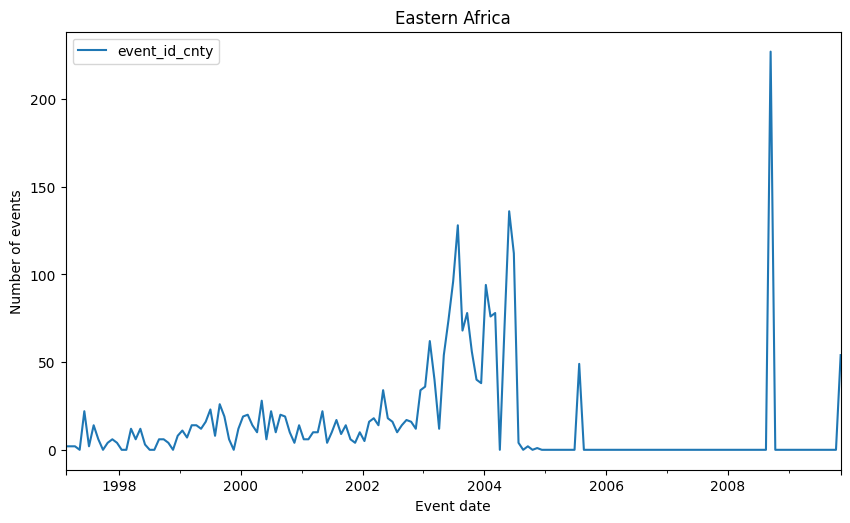

In [52]:
if aa.empty == False:
    aa.plot(use_index=True, figsize=(10,6), title=region)
    plt.ylabel("Number of events")
    plt.xlabel("Event date")
    plt.legend()
    plt.subplots_adjust(bottom=0.15)
    #plt.savefig(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\Plot timeline regions\timeline_%s" %region, dpi=700)
    plt.show()

In [8]:
reg = df.groupby(["region"])["fatalities"].sum().index.tolist()
viol = df.groupby(["event_type"])["fatalities"].sum().index.tolist()

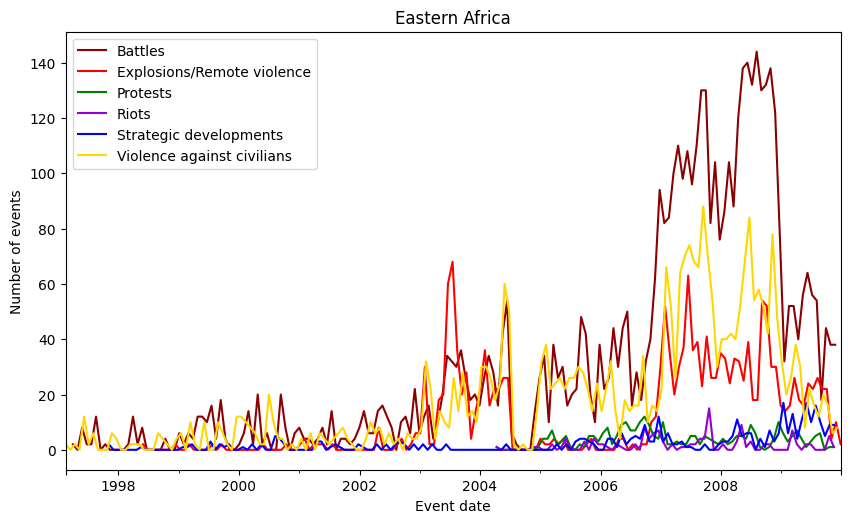

In [10]:
color_dict = {'Protests': 'green', 'Riots': 'darkviolet', 'Battles': 'darkred','Explosions/Remote violence': 'red', 'Strategic developments': 'blue',
'Violence against civilians': 'gold'}
for region in reg:
    re=df.loc[df["region"] == region]
    for typ in viol:
        pro = re.loc[re["event_type"] == typ]["fatalities"]
        g_pro = pro.groupby(pd.Grouper(freq='40320min')).count()
        if g_pro.empty == False:              
            g_pro.plot(use_index=True, figsize=(10,6), title=region, label=typ, color=color_dict[typ])
    plt.ylabel("Number of events")
    plt.xlabel("Event date")
    plt.legend()
    plt.subplots_adjust(bottom=0.15)
    #plt.savefig(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\Plot timeline regions\timeline_%s" %region, dpi=700)
    plt.show()

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


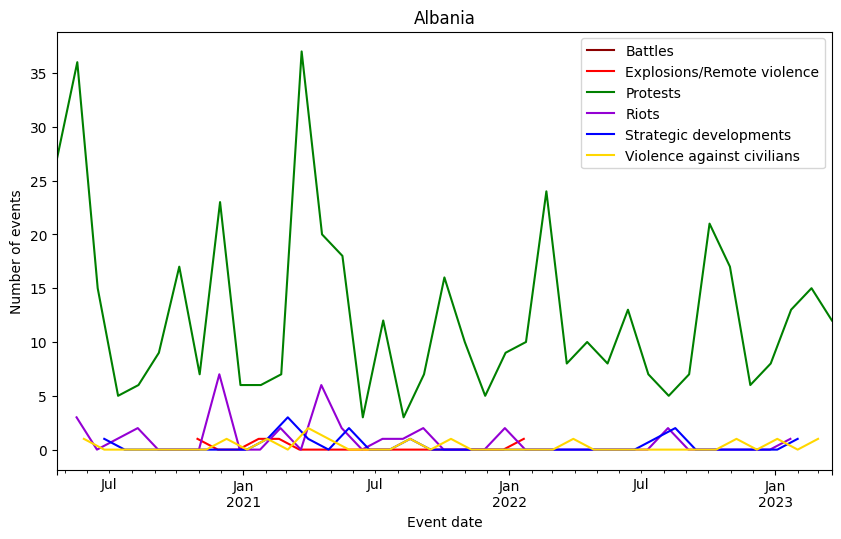

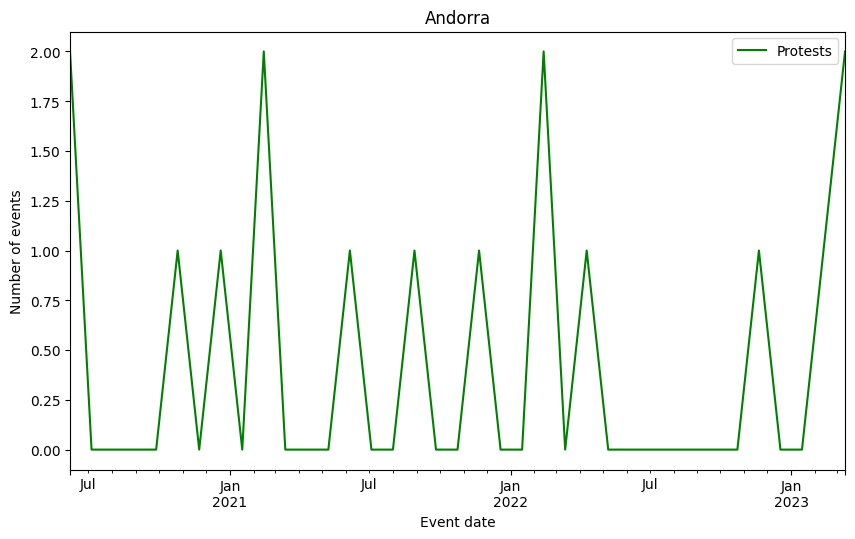

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


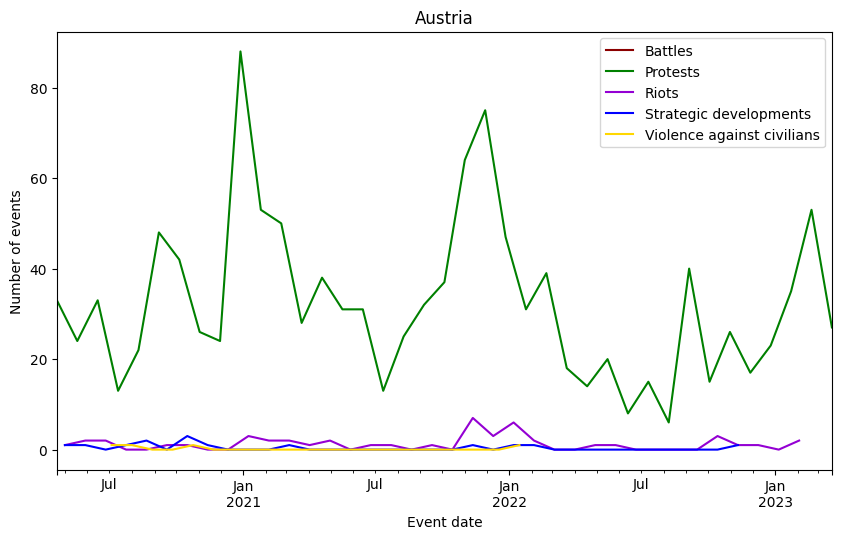

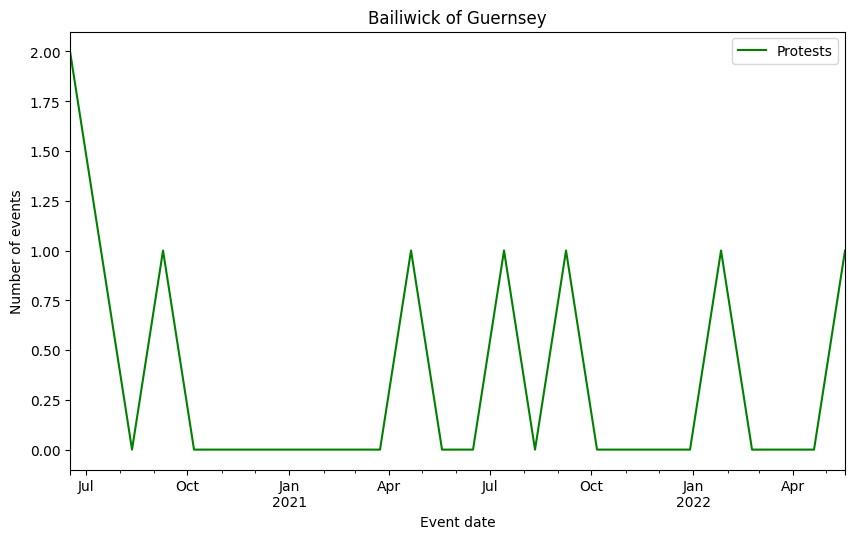

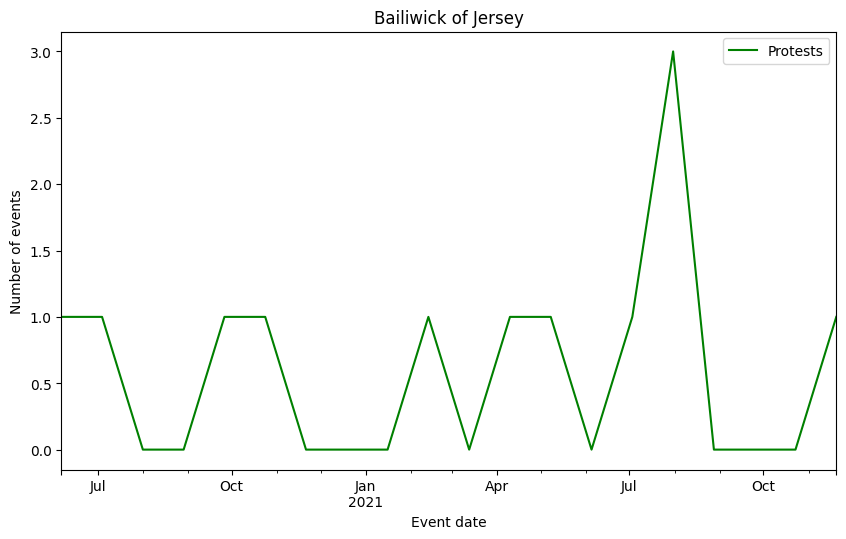

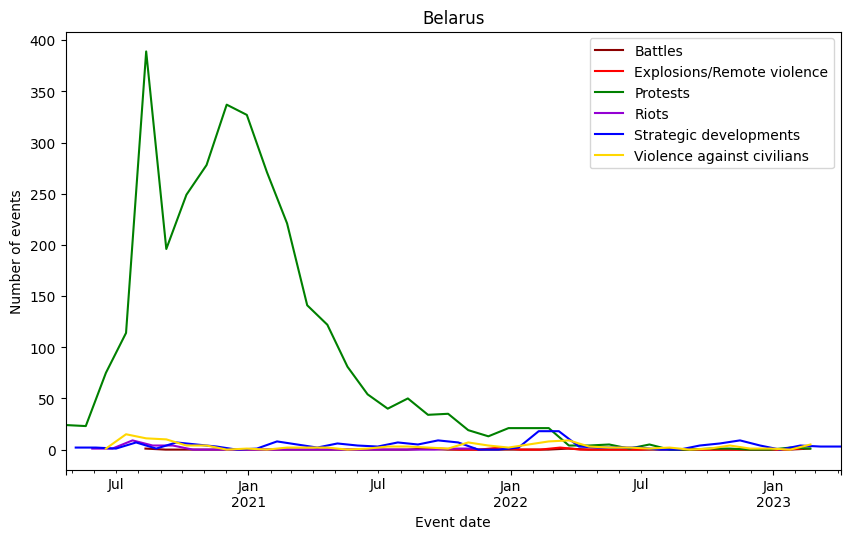

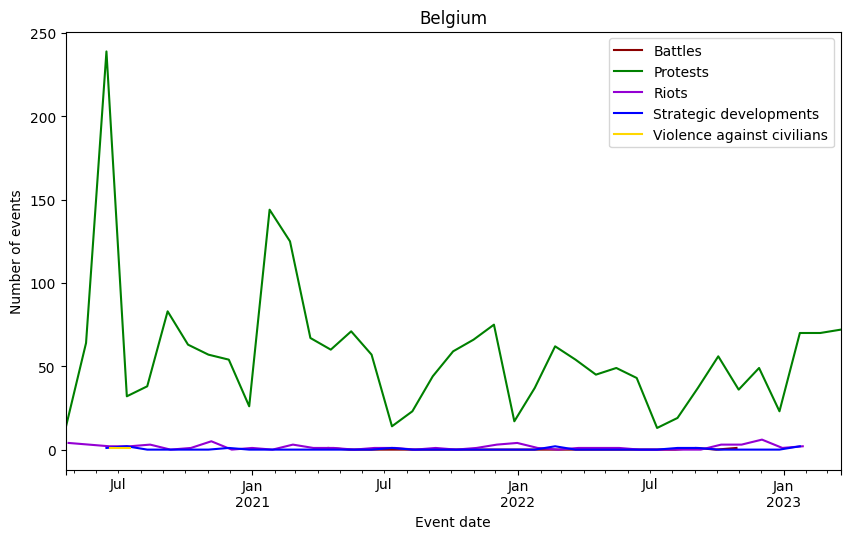

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


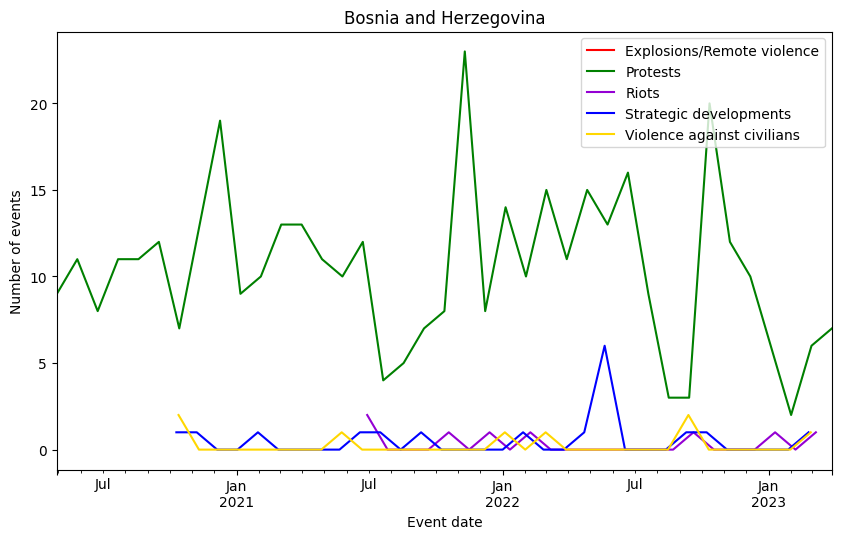

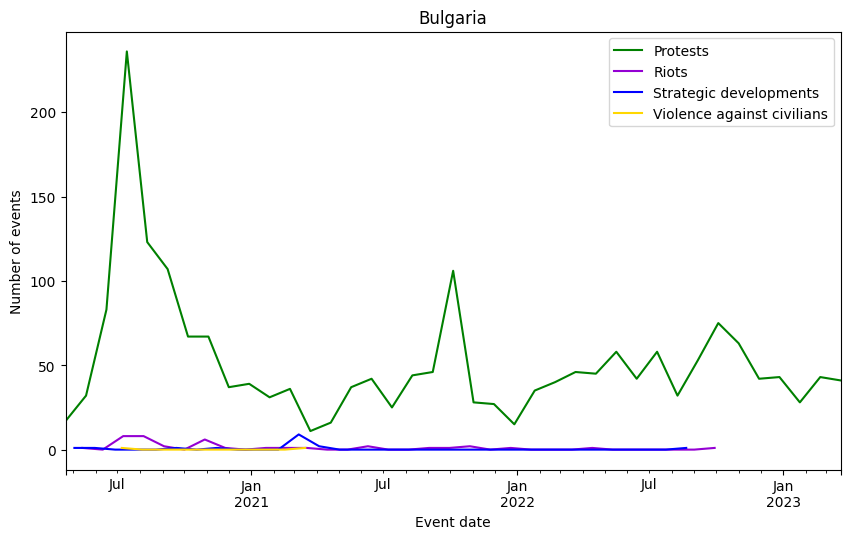

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


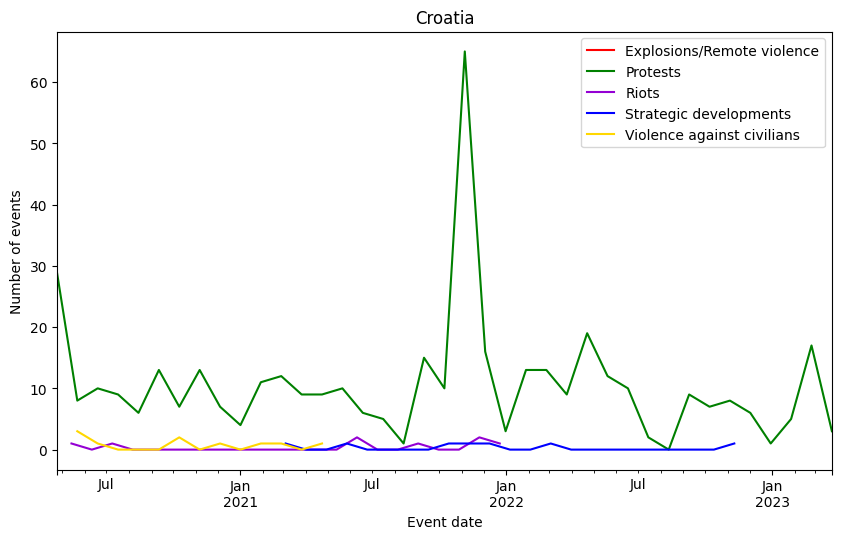

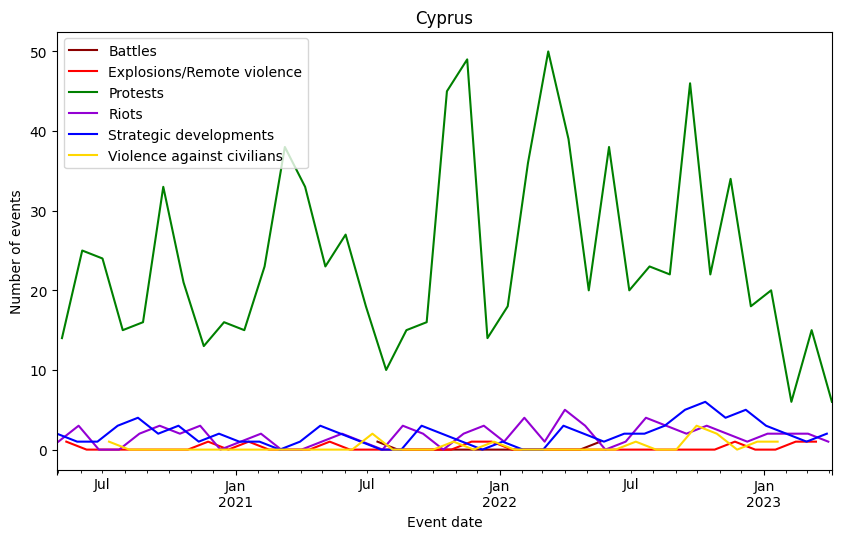

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


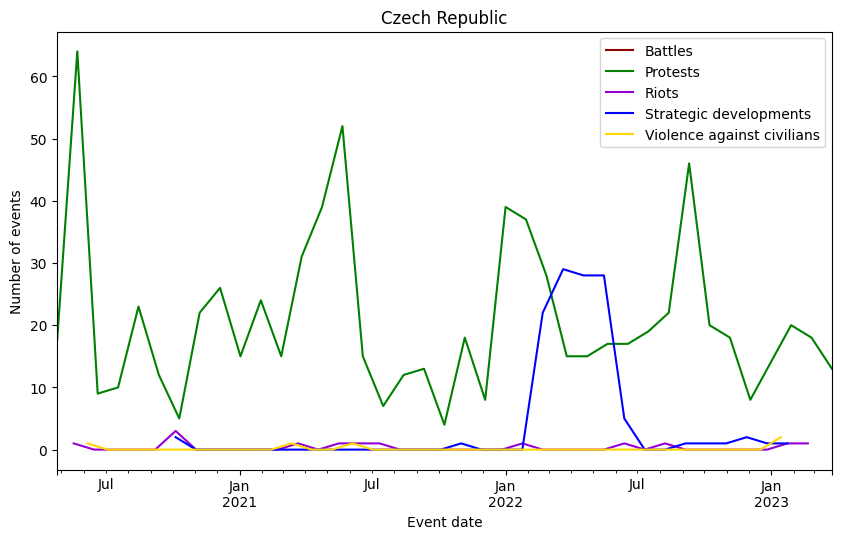

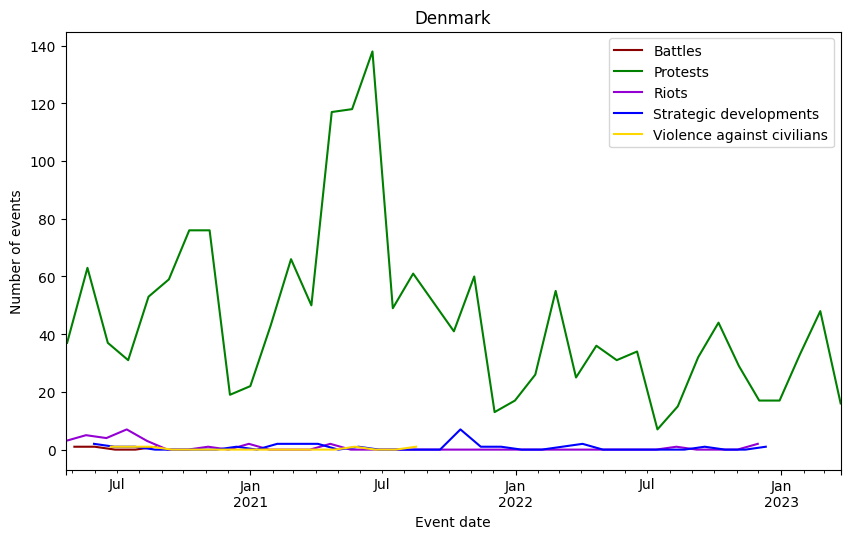

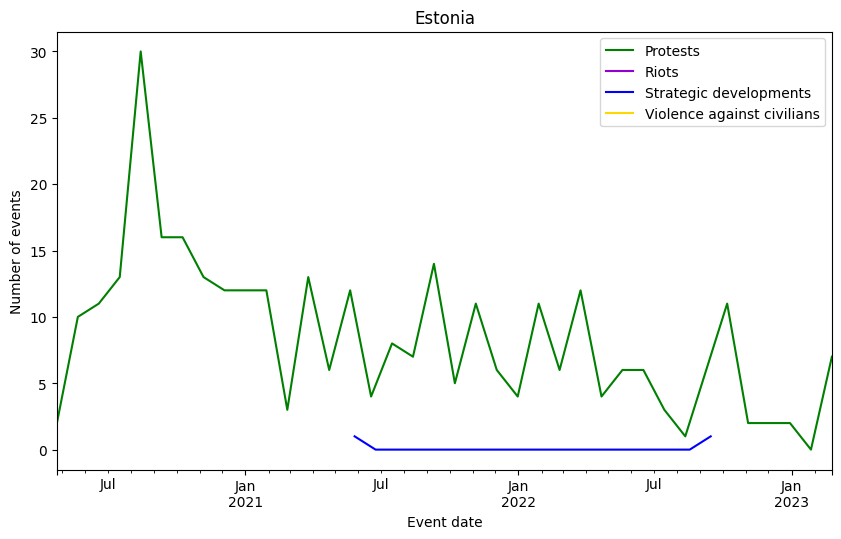

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


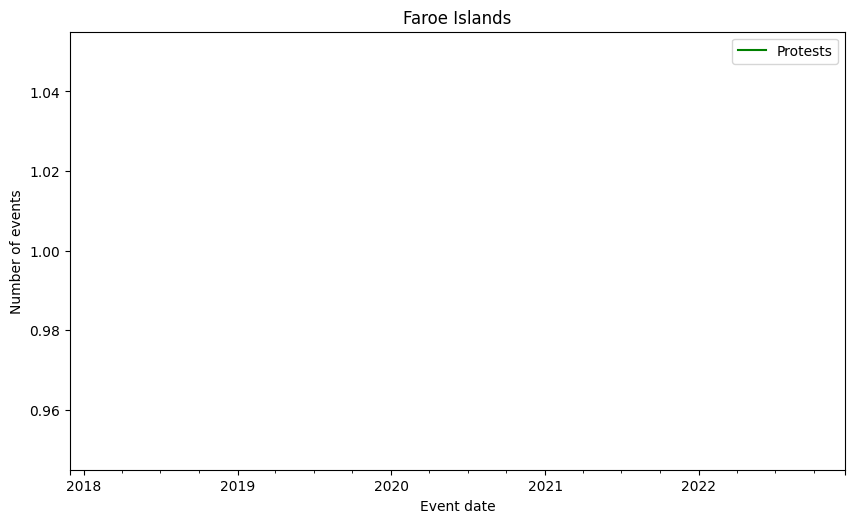

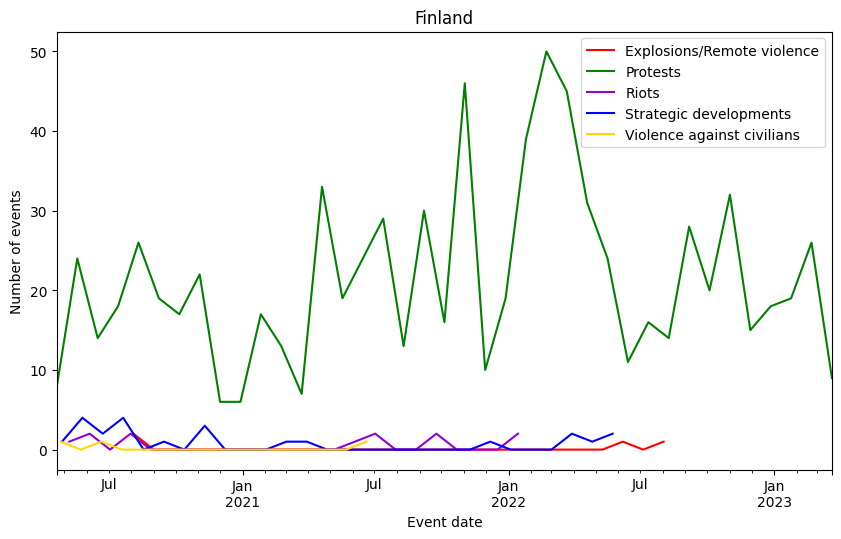

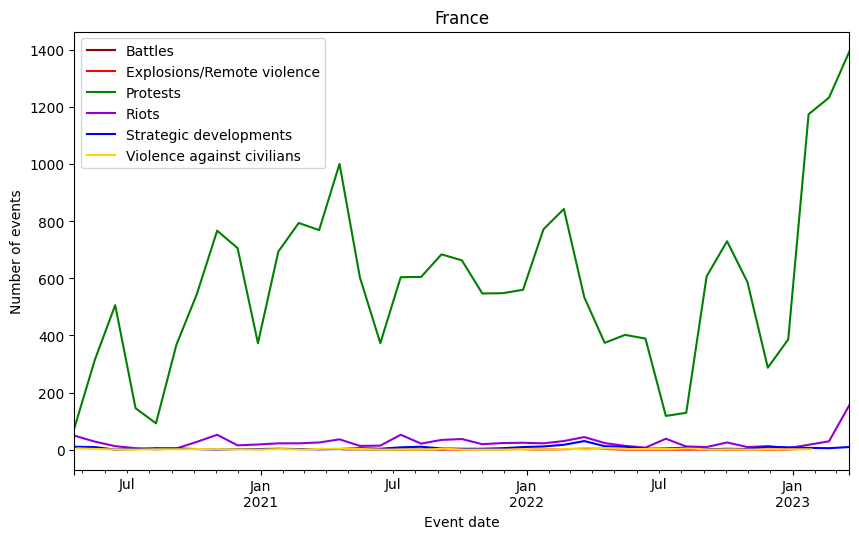

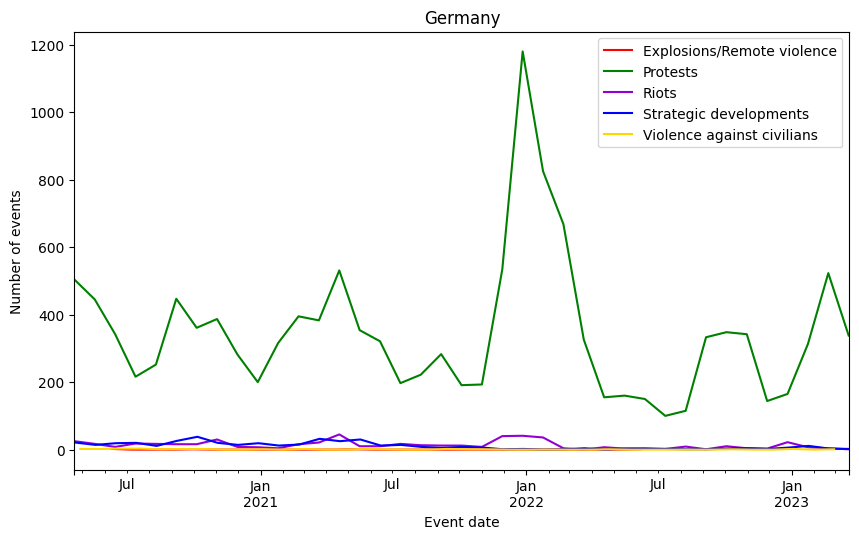

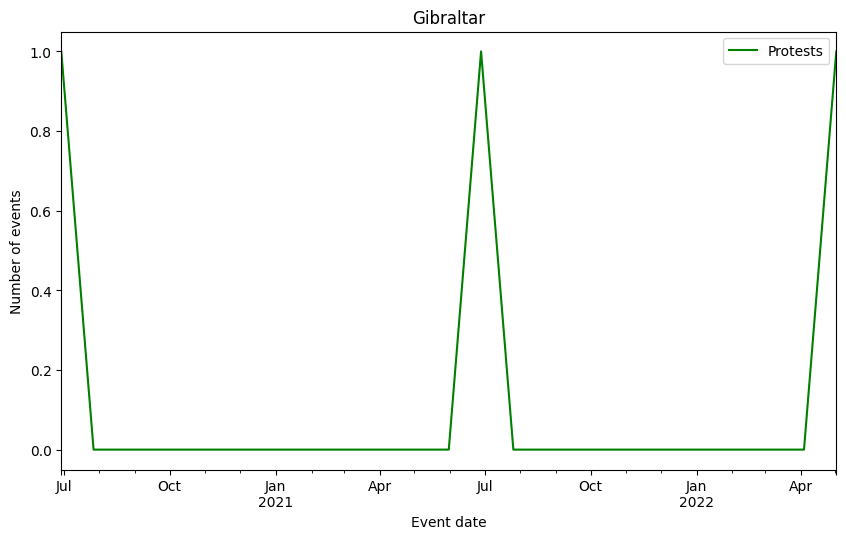

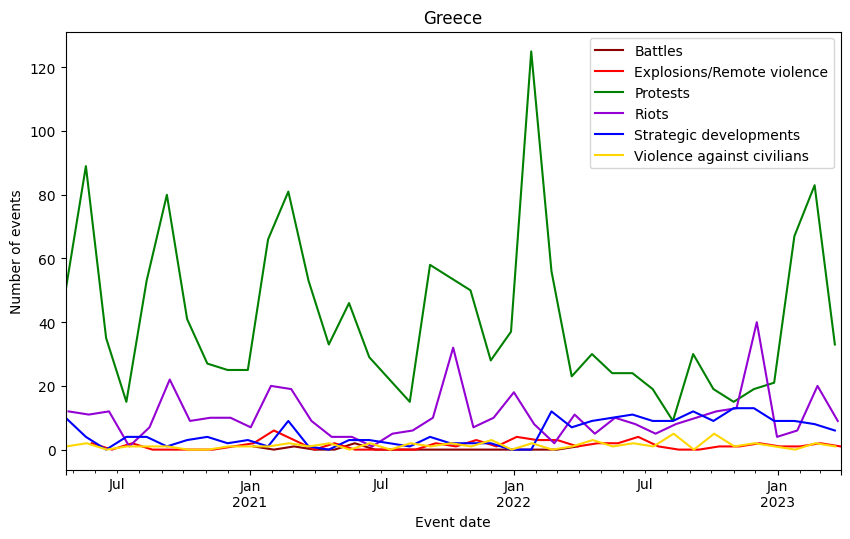

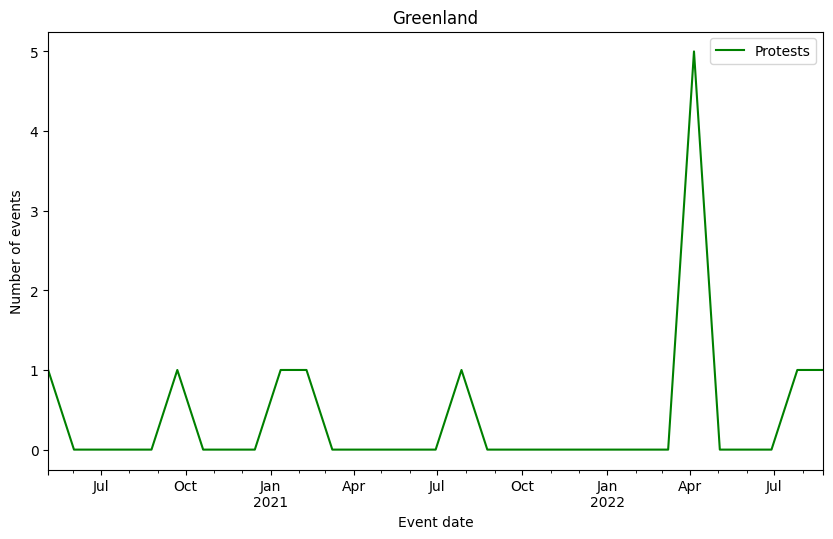

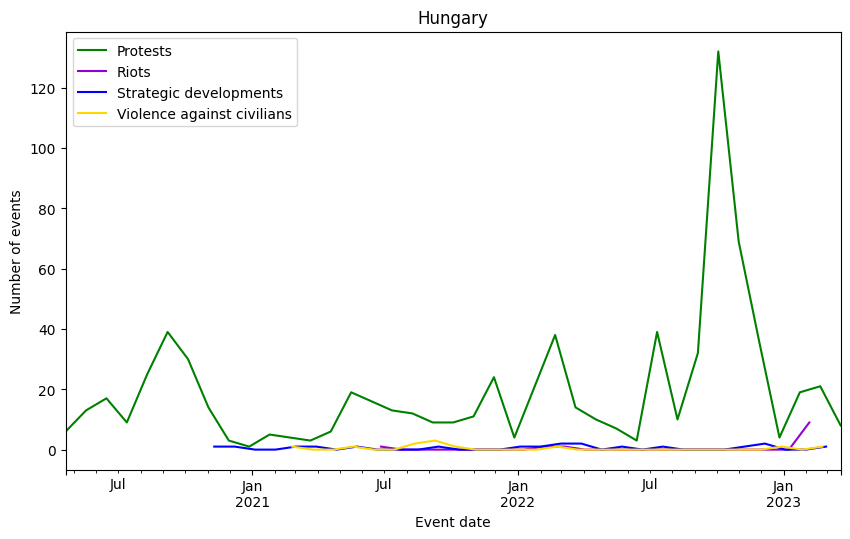

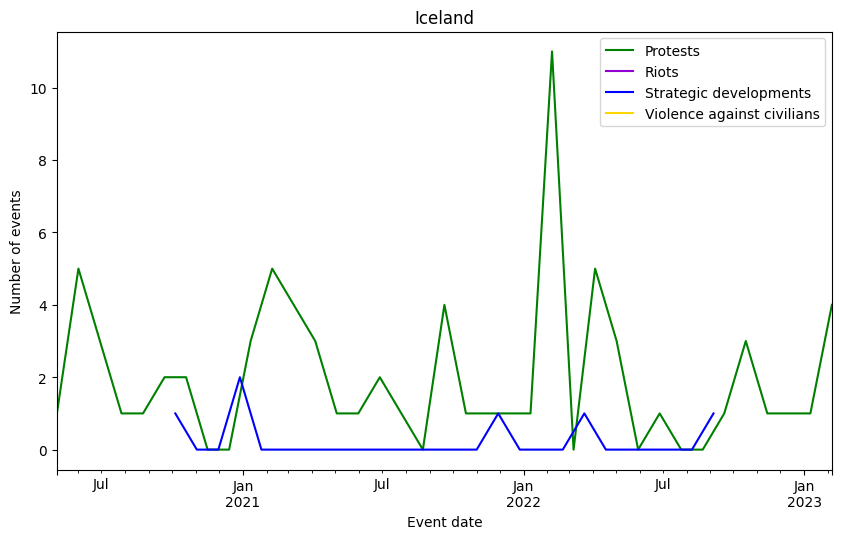

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


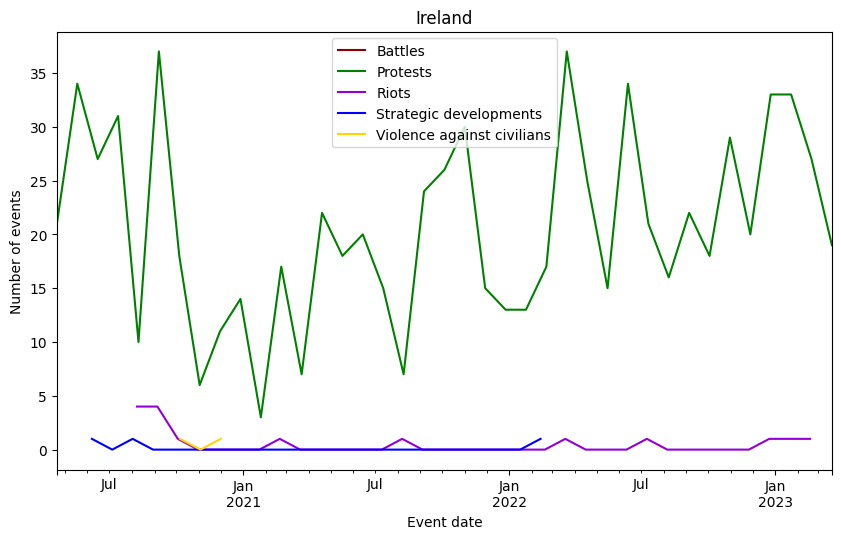

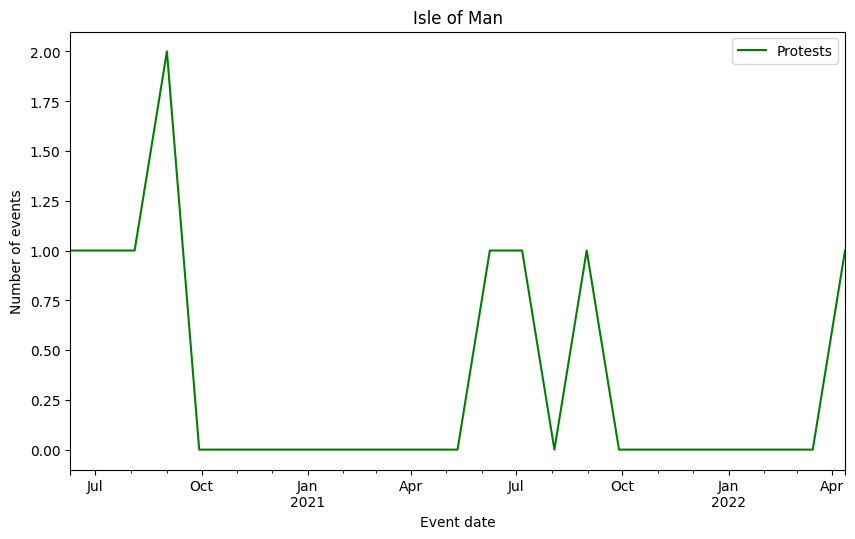

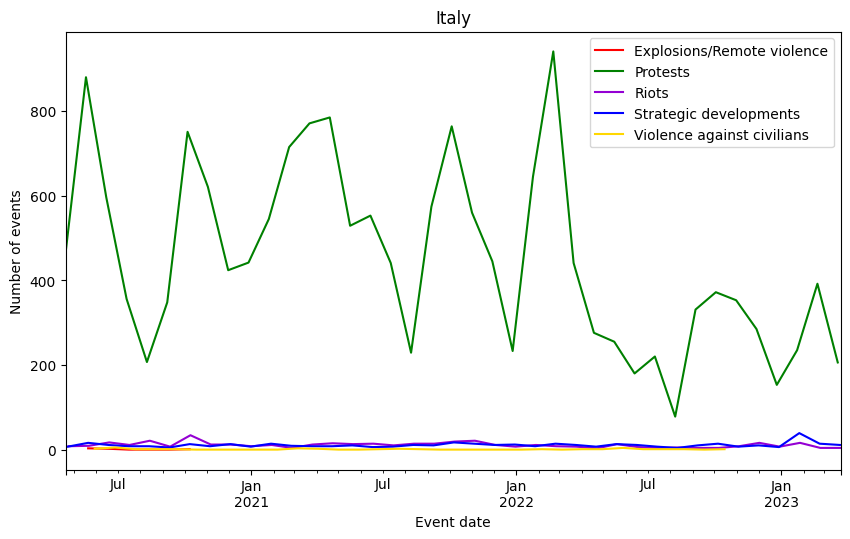

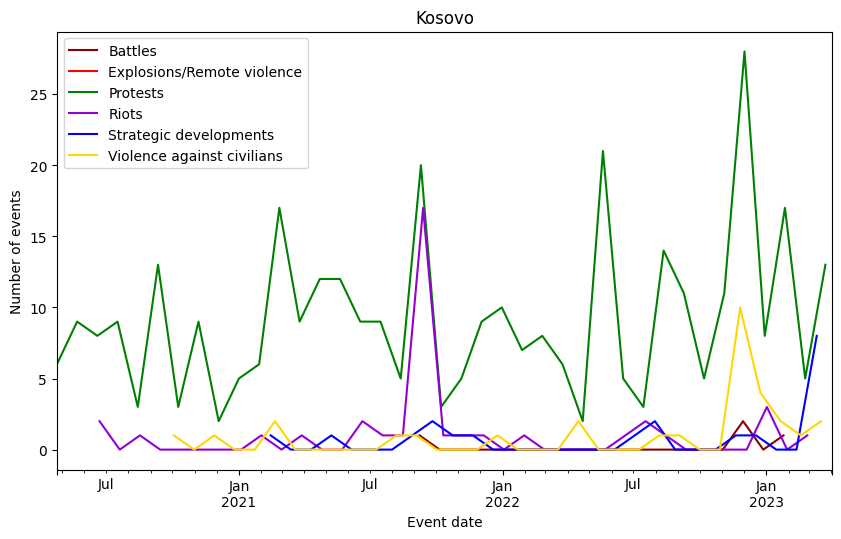

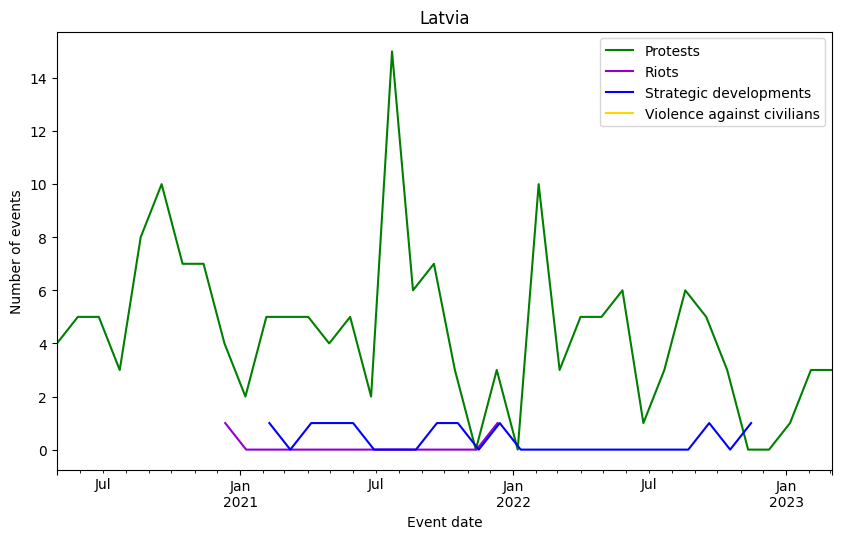

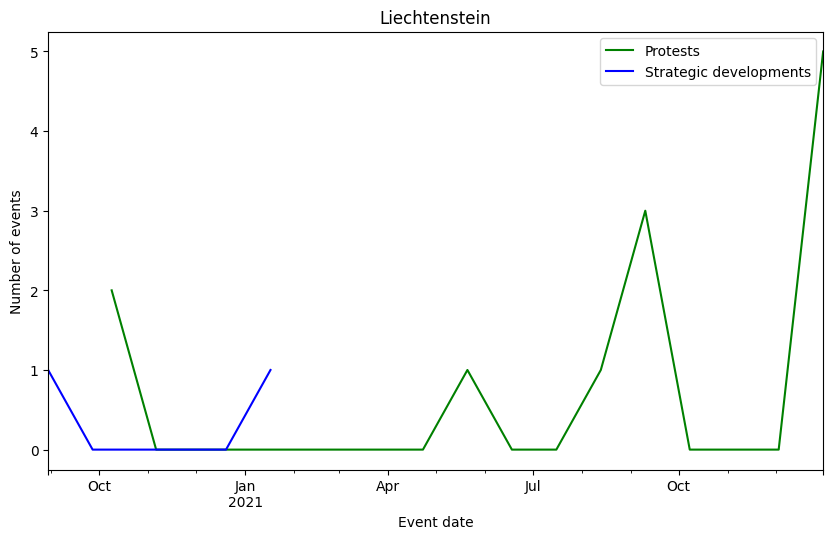

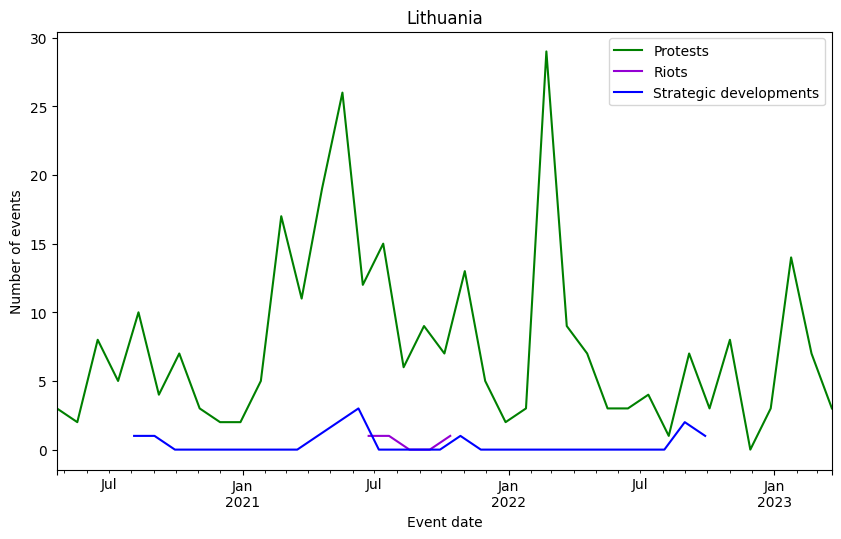

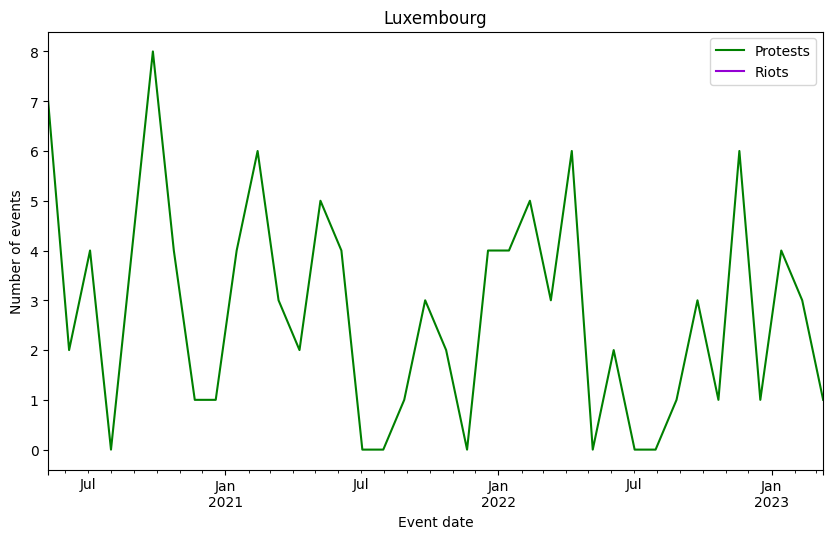

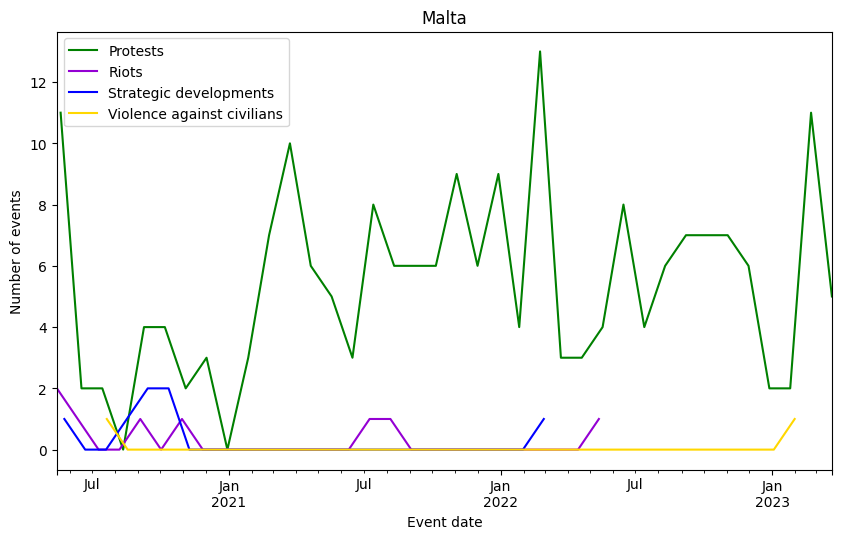

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


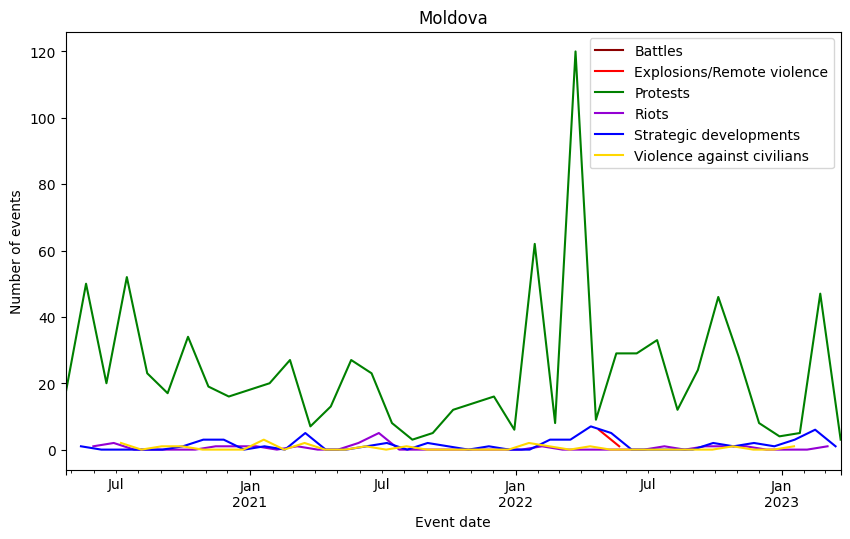

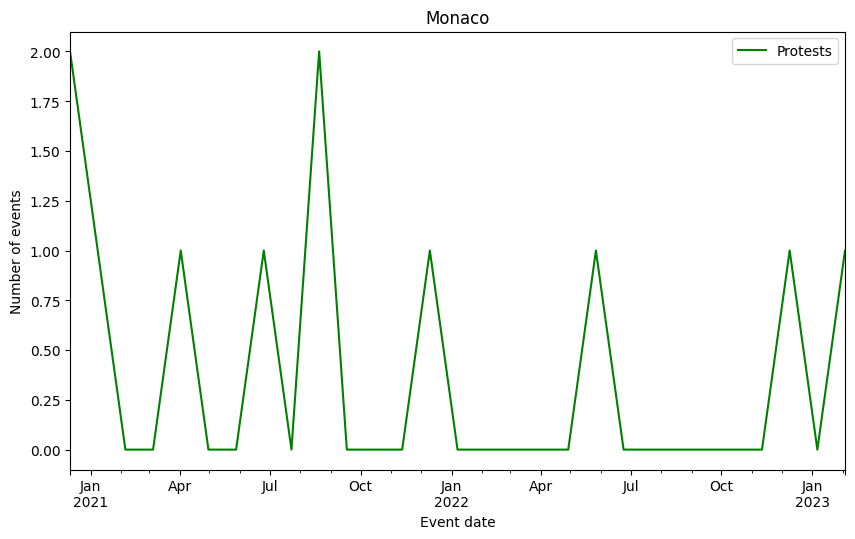

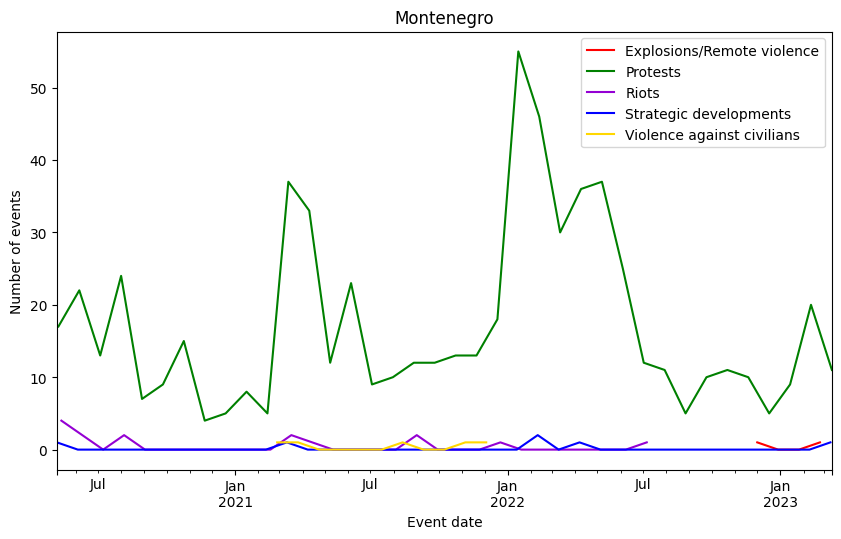

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


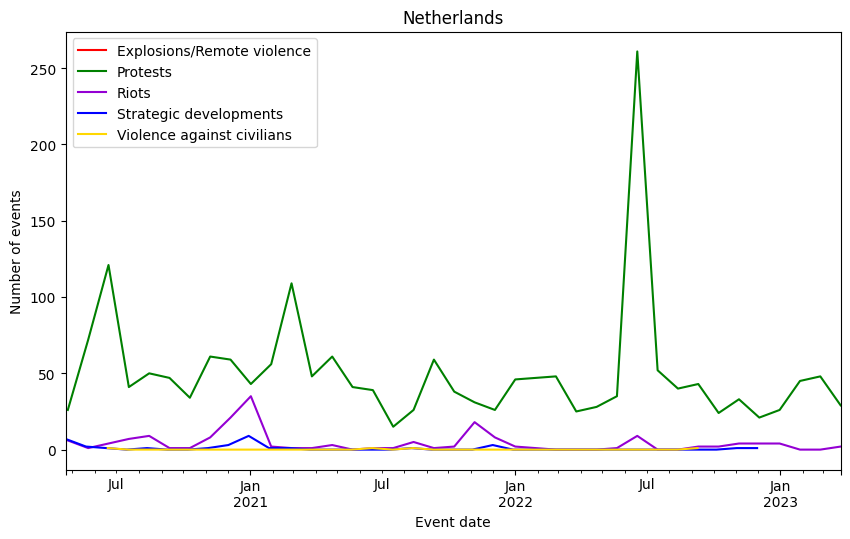

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


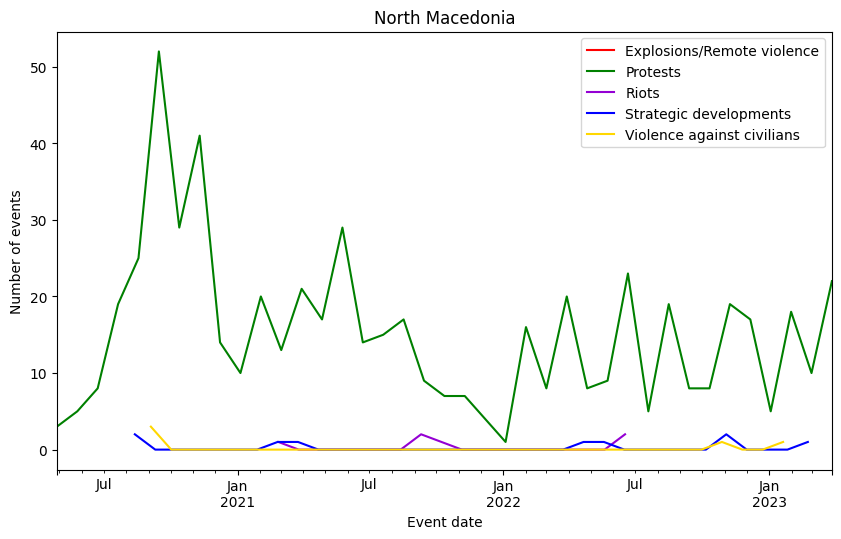

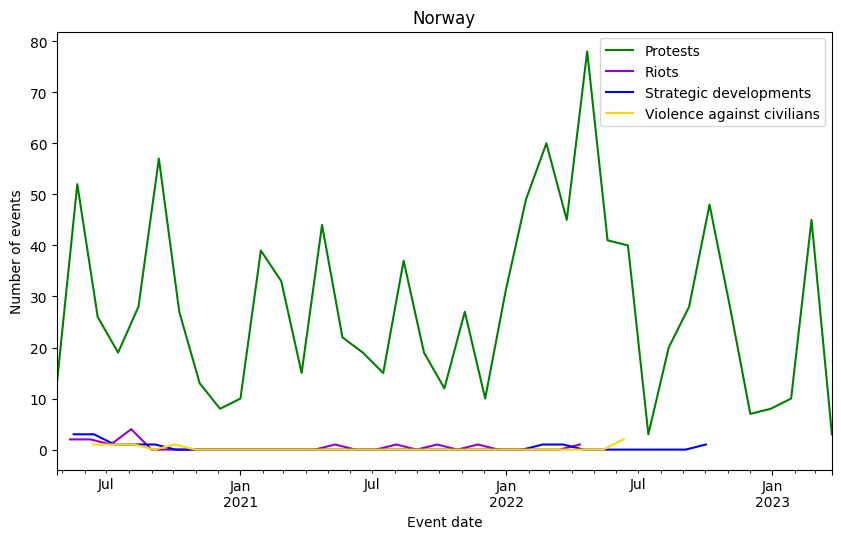

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


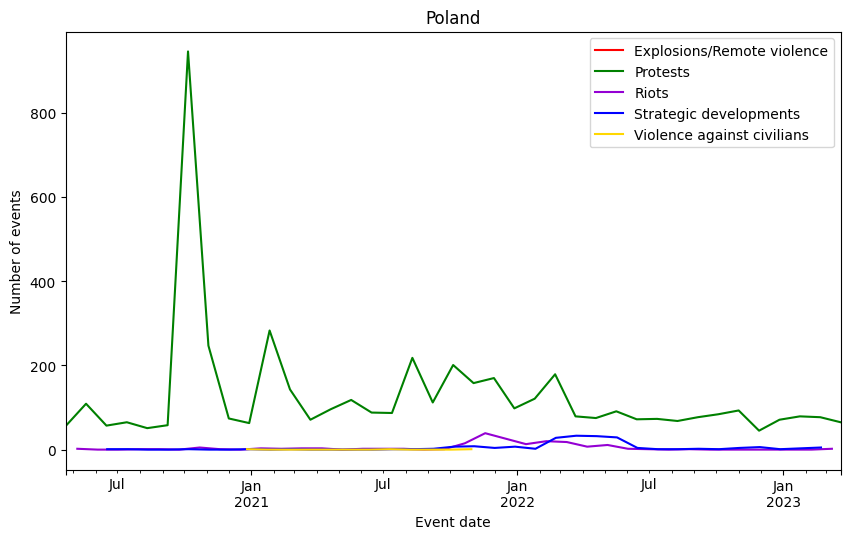

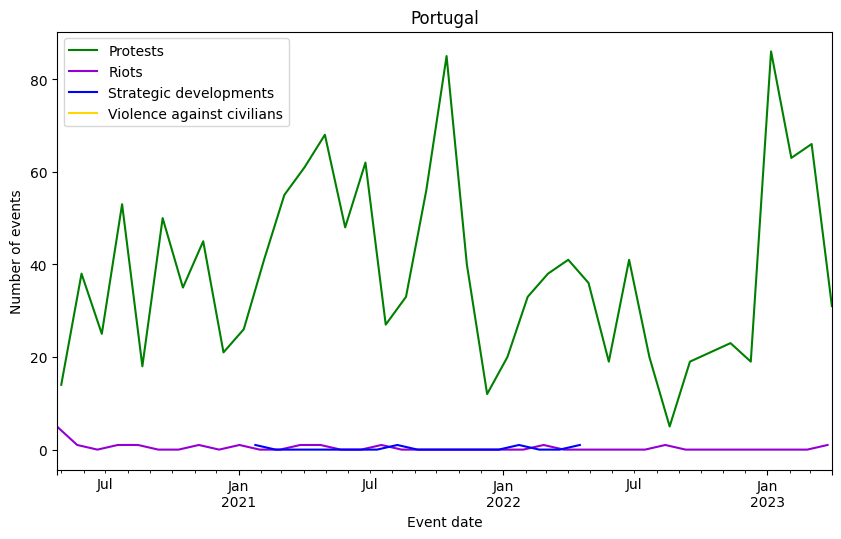

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


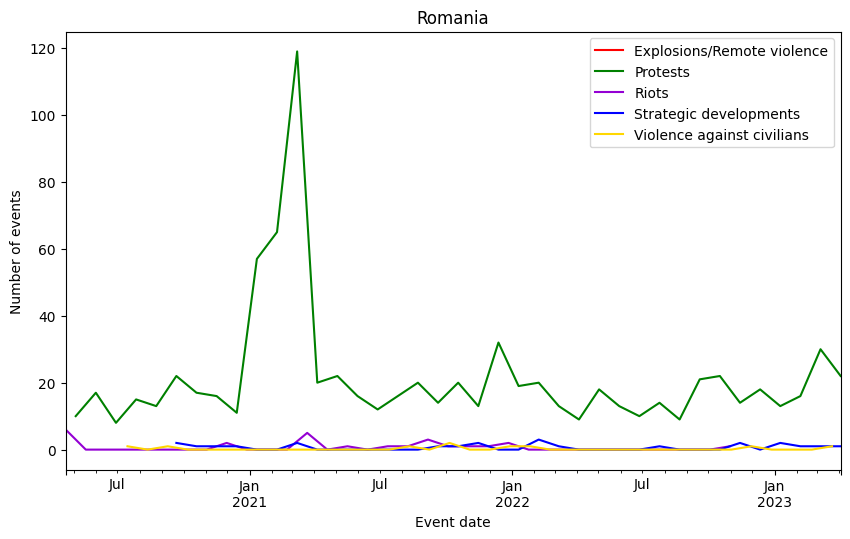

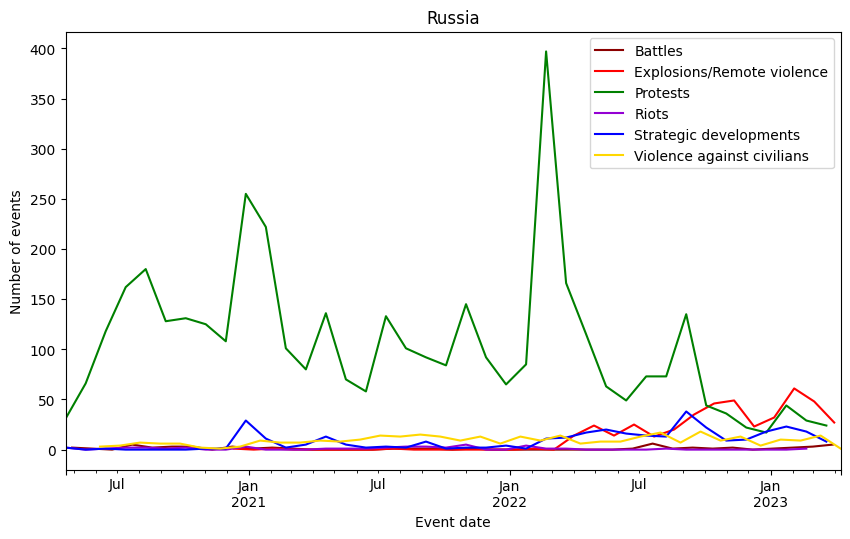

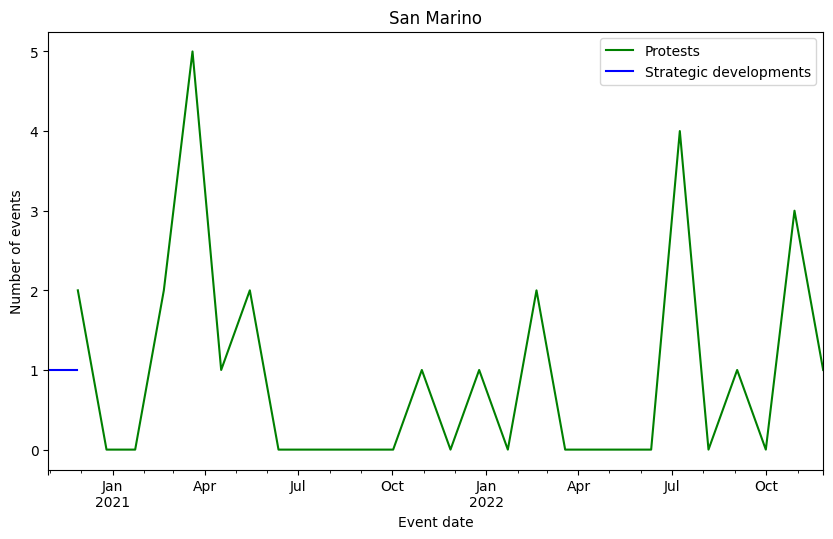

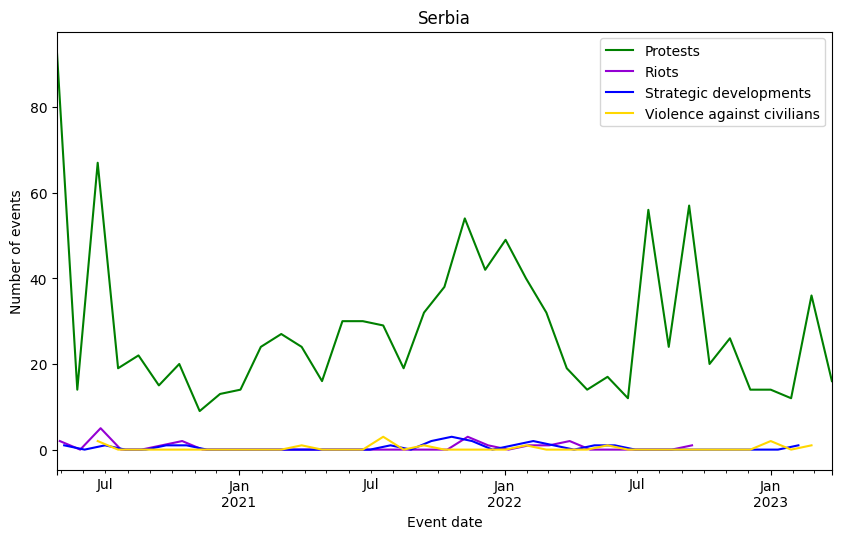

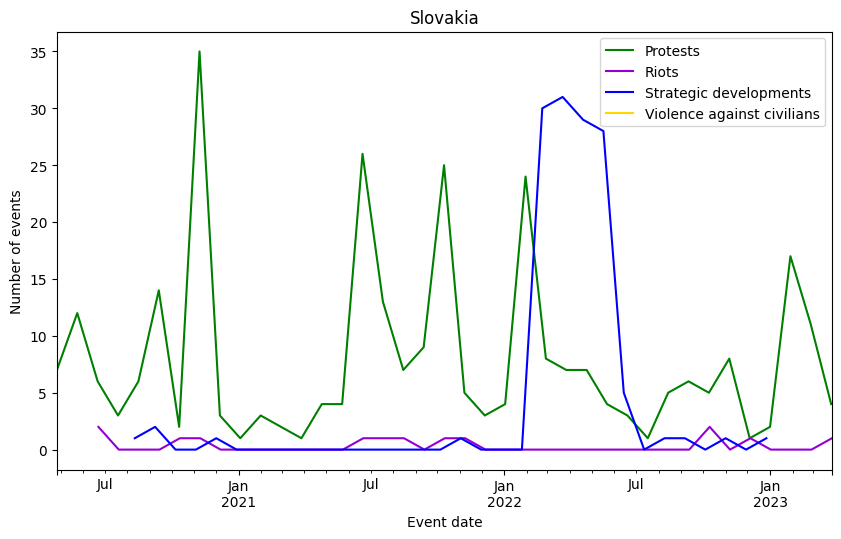

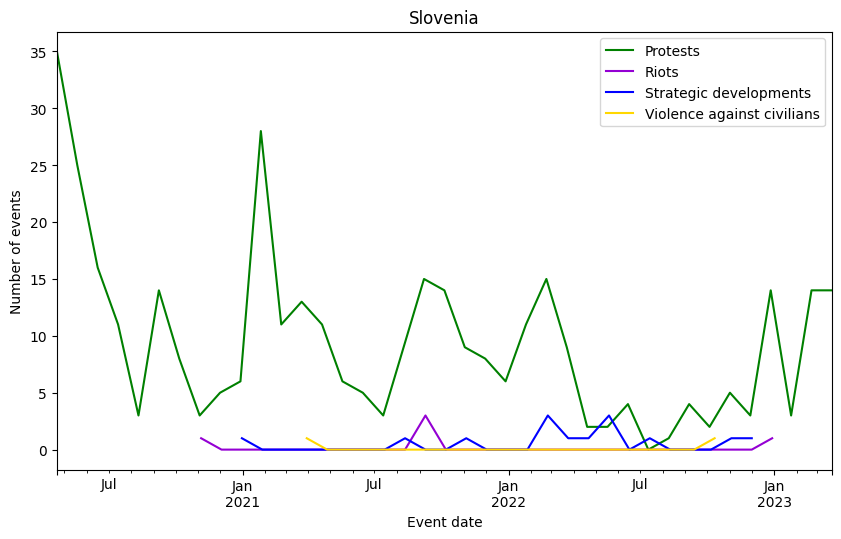

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


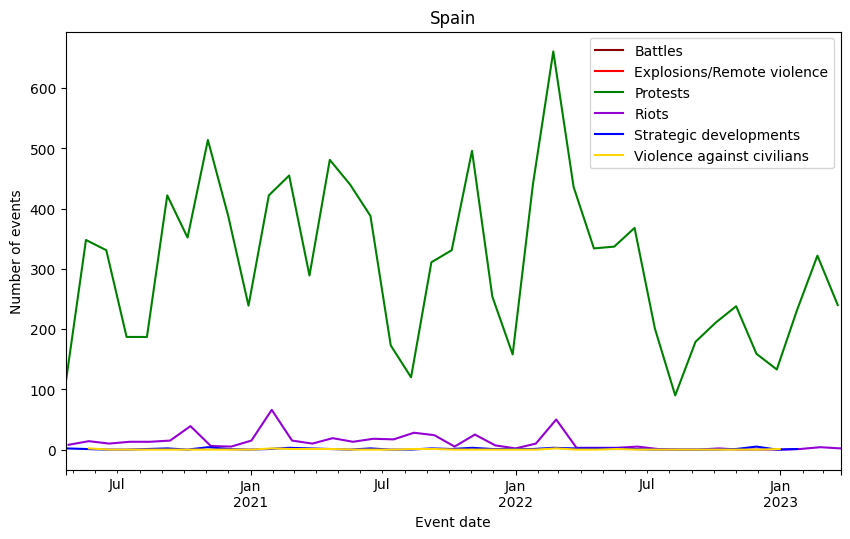

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


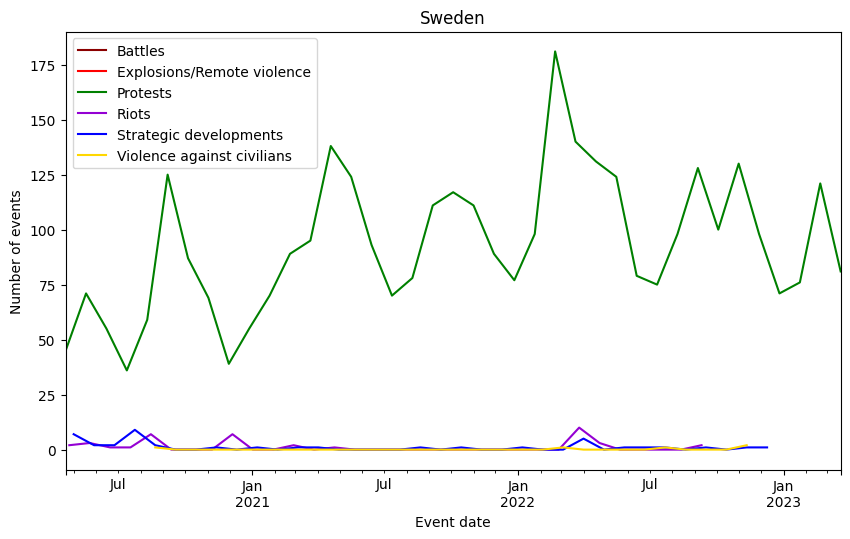

C:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1400: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


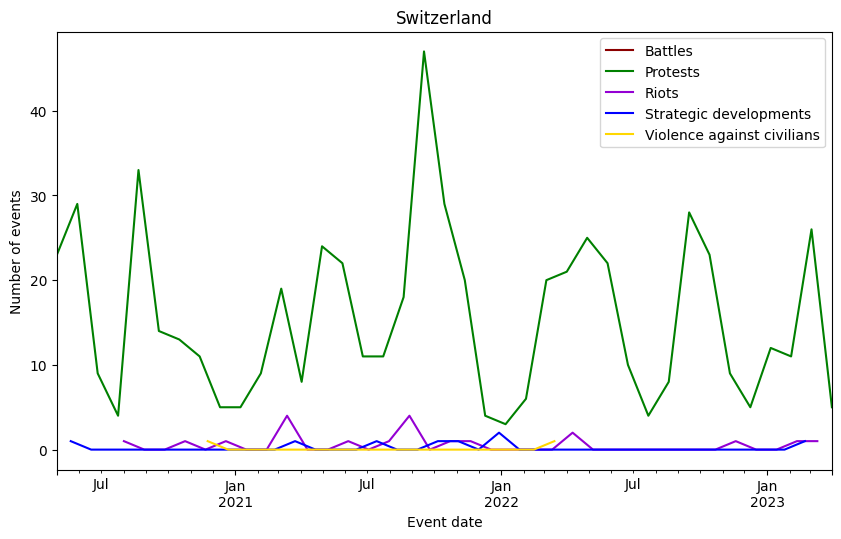

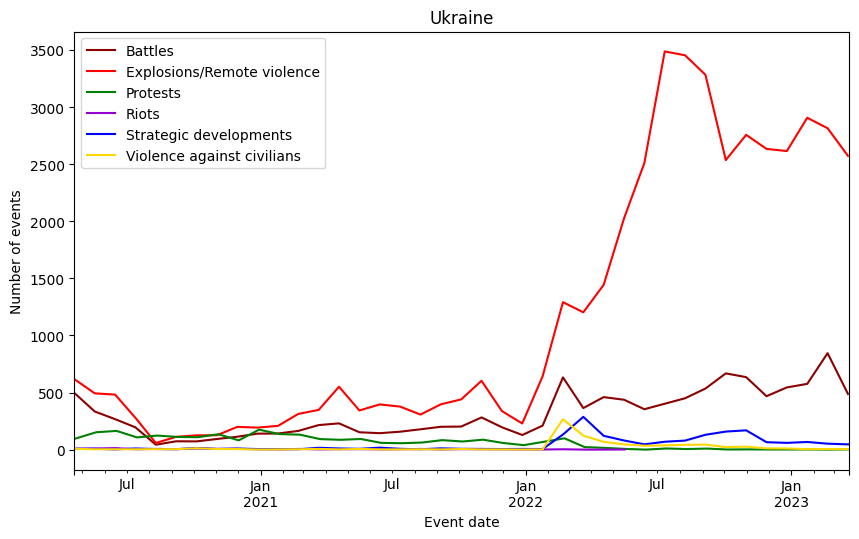

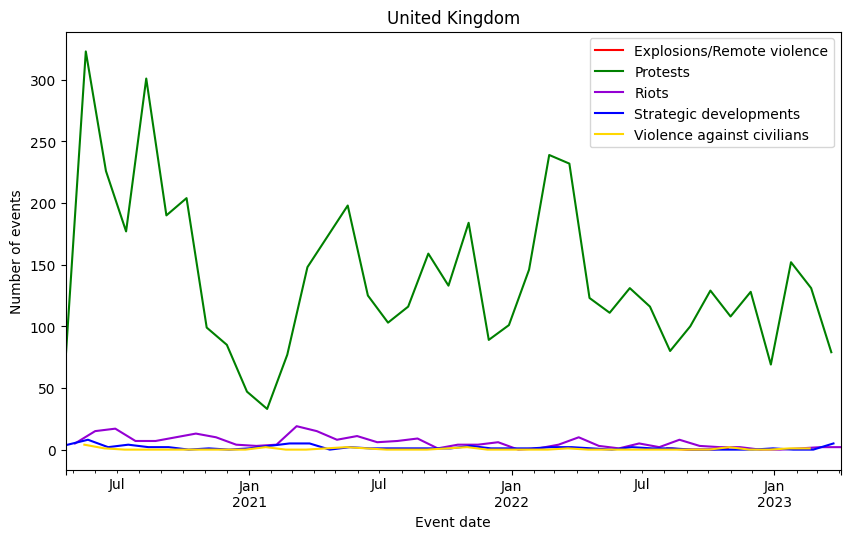

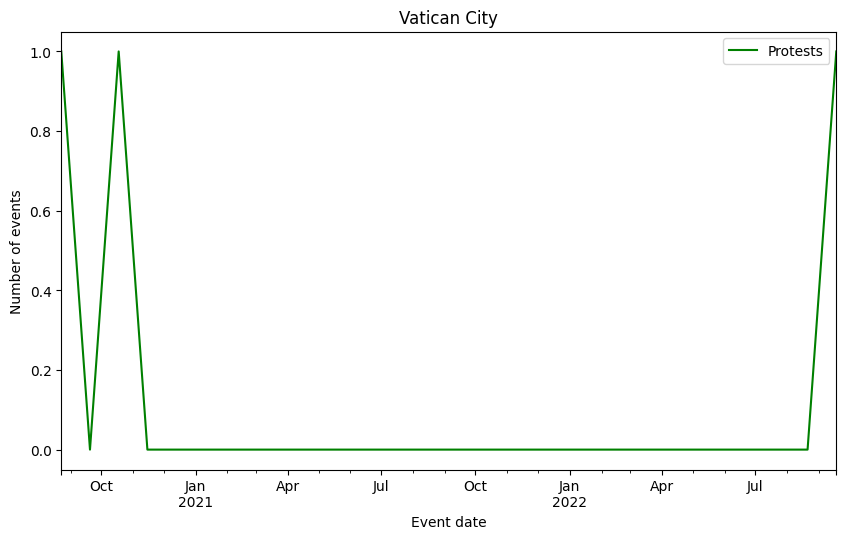

In [254]:
df_eu=df.loc[df["region"]=="Europe"]
for cou in countr:
    re=df_eu.loc[df_eu["country"] == cou]
    for typ in viol:
        pro = re.loc[re["event_type"] == typ]["fatalities"]
        g_pro = pro.groupby(pd.Grouper(freq='40320min')).count()
        if g_pro.empty == False:      
            g_pro.plot(use_index=True, figsize=(10,6), title=cou, label=typ, color=color_dict[typ])
    plt.ylabel("Number of events")
    plt.xlabel("Event date")
    plt.legend()
    plt.subplots_adjust(bottom=0.15)
    ax.set_xlim("Text(0.0, 0, '0.0')", "Text(1.0, 0, '1.0')")
    plt.savefig(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\timeline_Europe_%s" %cou, dpi=700)
    plt.show()

In [323]:
df_eu=df.loc[df["region"]=="Europe"]
countr = df_eu.groupby(["country"])["fatalities"].count()
countr1=countr[countr>3000]
countr2=countr1.index.tolist()

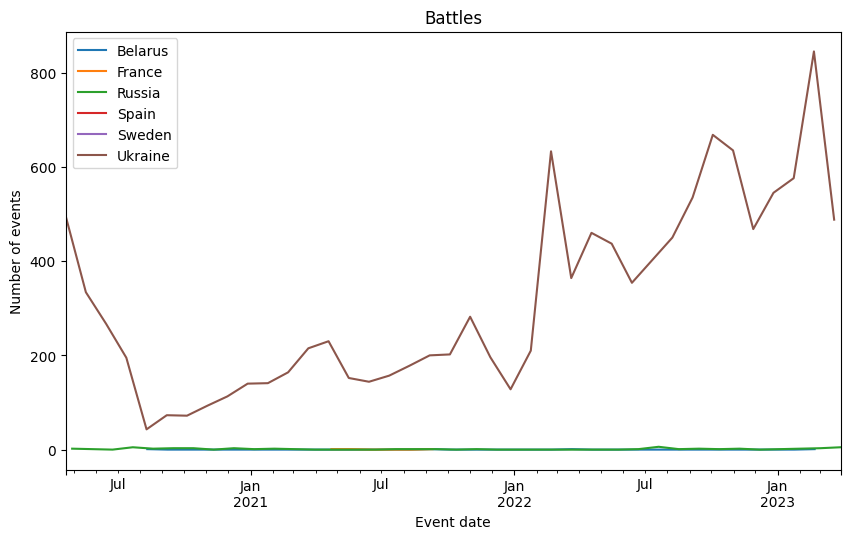

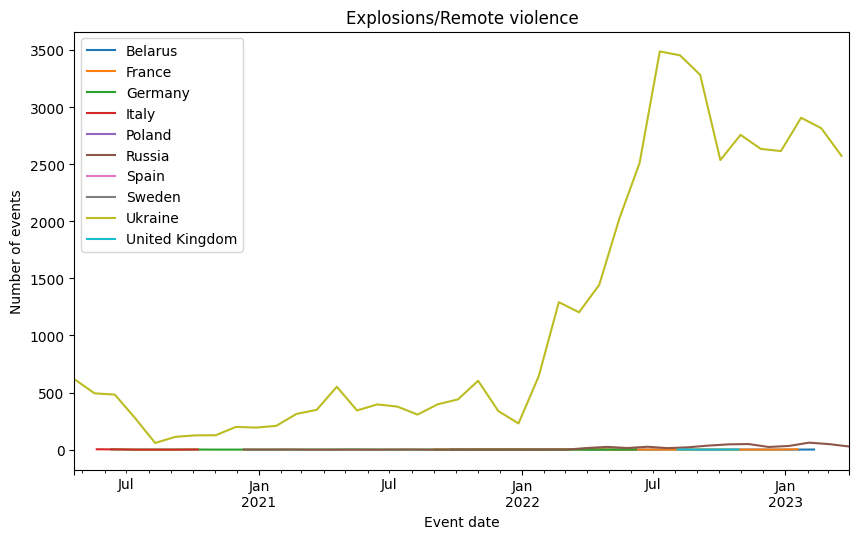

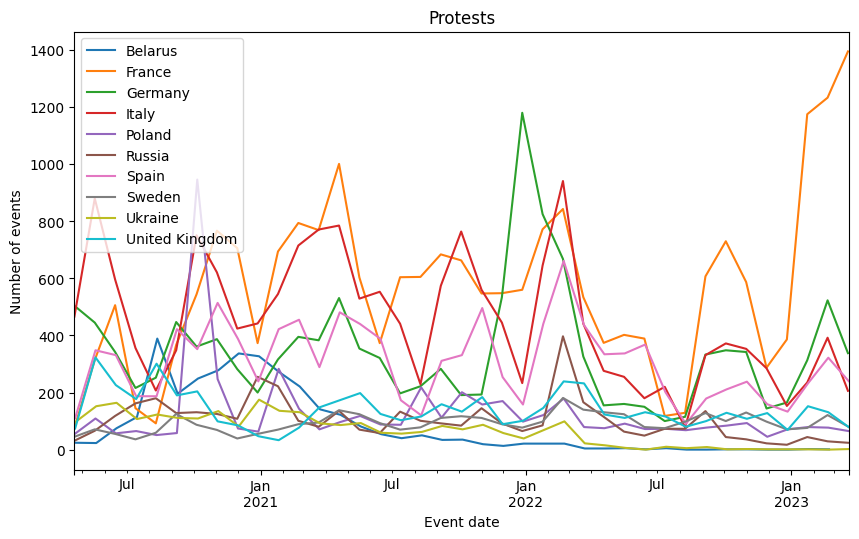

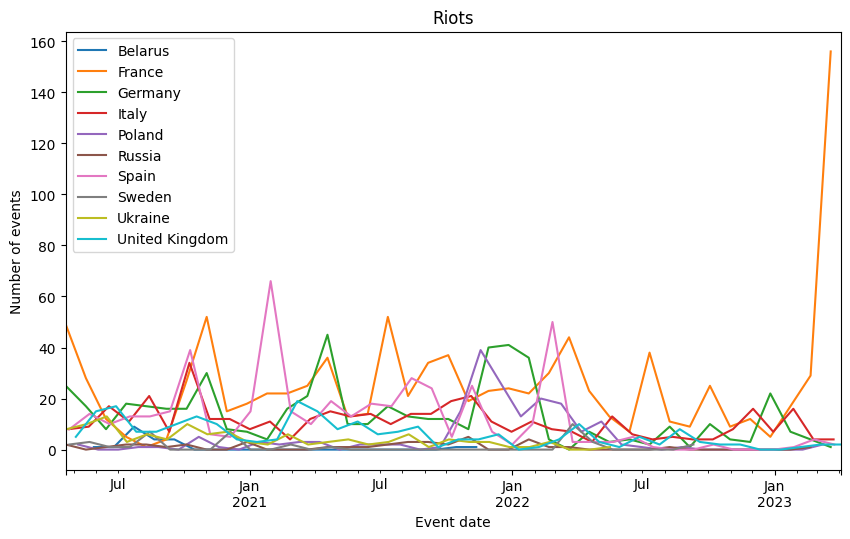

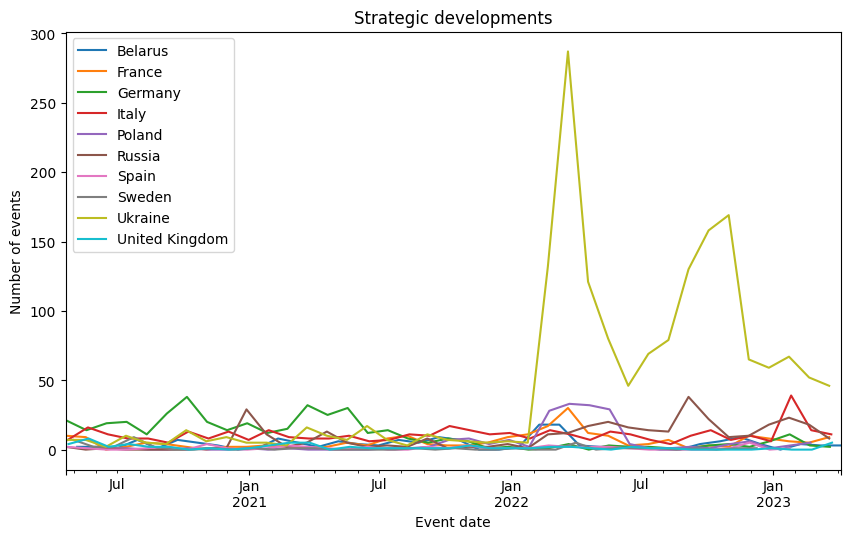

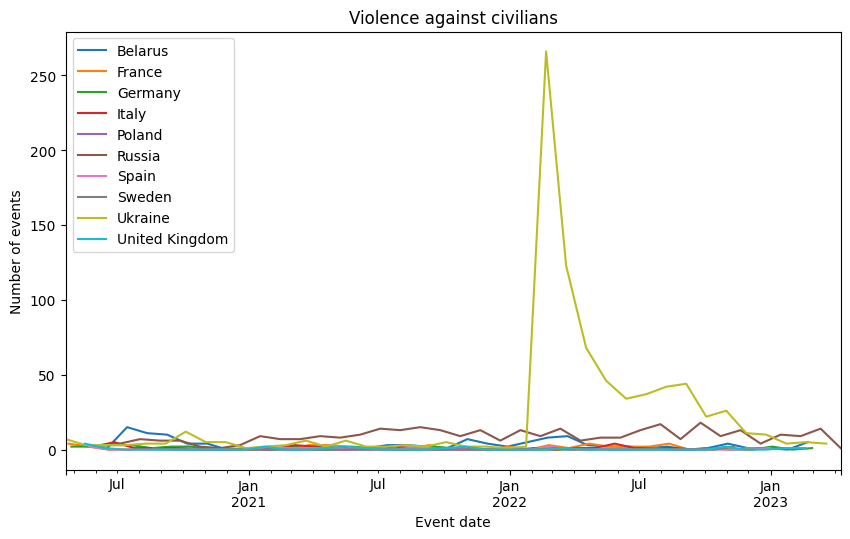

In [419]:
for typ in viol:
    ev_type = df_eu.loc[df_eu["event_type"] == typ]
    for cou in countr2:
        re=ev_type.loc[ev_type["country"] == cou]["fatalities"]
        g_pro = re.groupby(pd.Grouper(freq='40320min')).count()
        if g_pro.empty == False:      
            g_pro.plot(use_index=True, figsize=(10,6), title=typ, label=cou)
    plt.ylabel("Number of events")
    plt.xlabel("Event date")
    plt.legend(loc="upper left")
    plt.subplots_adjust(bottom=0.15)
    ax.set_xlim("Text(0.0, 0, '0.0')", "Text(1.0, 0, '1.0')")
    plt.savefig(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\Timeline by type\timeline_%s" %typ.replace('/', '_'), dpi=700)
    plt.show()

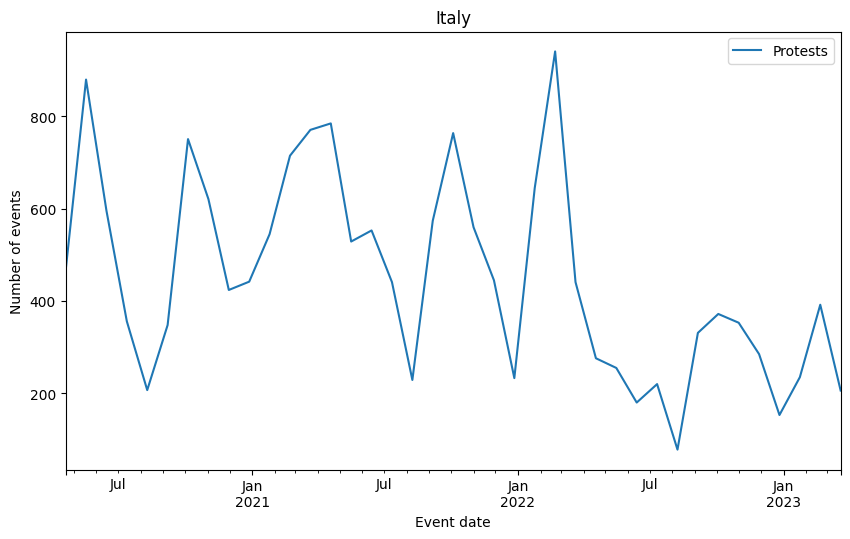

In [326]:
cou="Italy"
typ="Protests"
a=df_eu.loc[df_eu["country"] == cou]
b=a.loc[a["event_type"] == typ]["fatalities"]
c=b.groupby(pd.Grouper(freq='40320min')).count()
c.plot(use_index=True, figsize=(10,6), title=cou, label=typ)
plt.ylabel("Number of events")
plt.xlabel("Event date")
plt.legend()
plt.subplots_adjust(bottom=0.15)

In [399]:
cou="Italy"
typ="Protests"

In [413]:
df_eu

Empty DataFrame
Columns: [event_id_cnty, year, date_timestamp, time_precision, disorder_type, event_type, sub_event_type, actor1, assoc_actor_1, inter1, actor2, assoc_actor_2, inter2, interaction, civilian_targeting, iso, region, country, admin1, admin2, admin3, location, latitude, longitude, geo_precision, source, source_scale, notes, fatalities, tags, timestamp]
Index: []

[0 rows x 31 columns]

In [415]:
df_eu=df.loc[df["region"]=="Europe"]

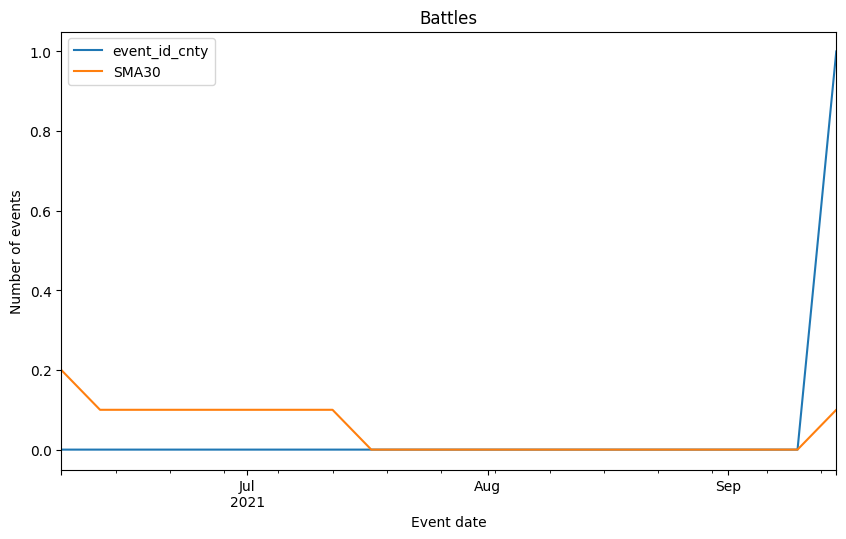

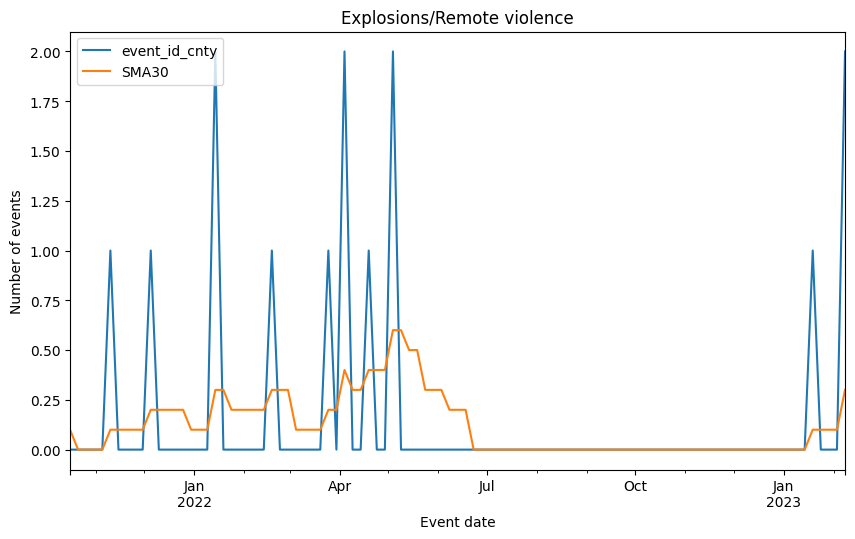

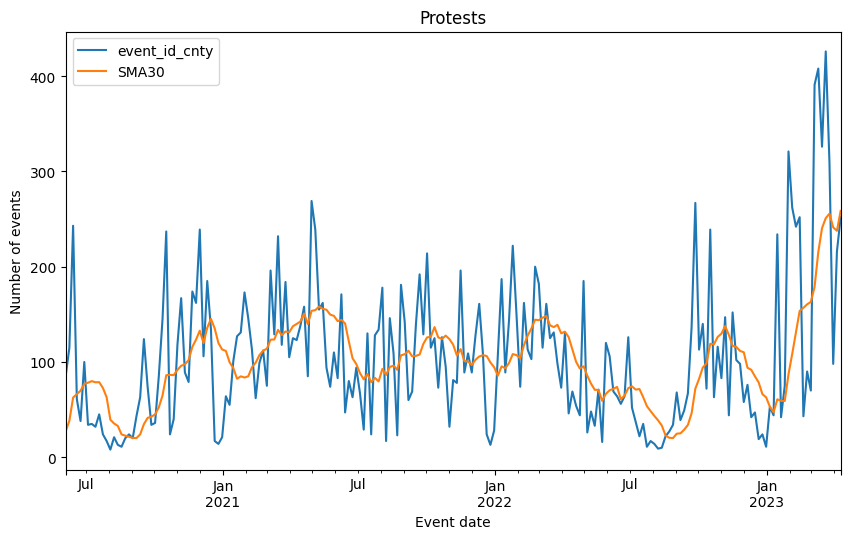

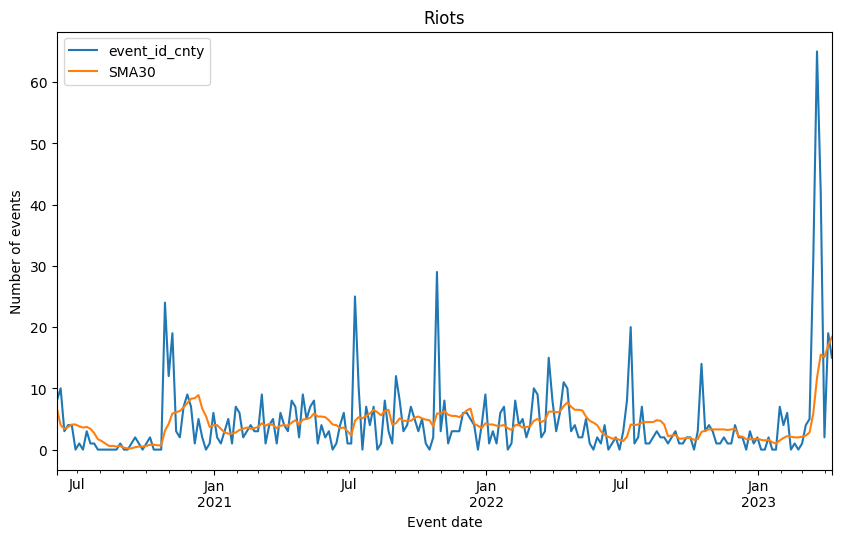

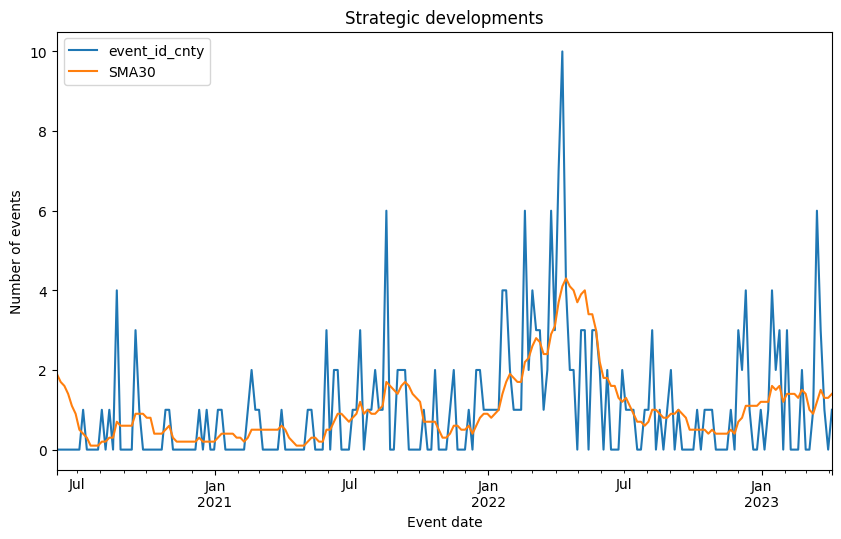

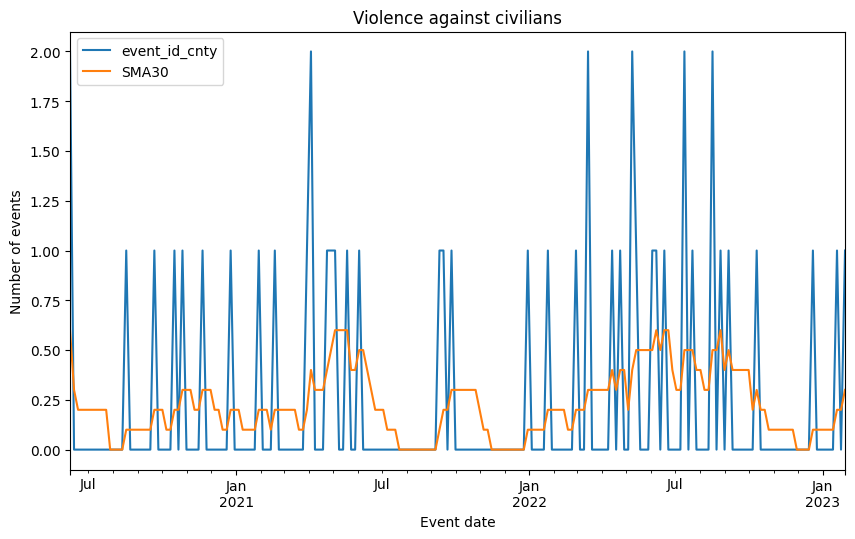

In [423]:
for typ in viol:
    g=df_eu.loc[df_eu["event_type"]==typ]
    a=g.loc[g["country"] == "France"]
    w=a.groupby(pd.Grouper(freq='5D')).count()
    w = w['event_id_cnty'].to_frame()
    w['SMA30'] = w["event_id_cnty"].rolling(10).mean()
    w.dropna(inplace=True)
    if w.empty == False:      
        w[["event_id_cnty", 'SMA30']].plot(figsize=(10,6), title=typ)

    plt.ylabel("Number of events")
    plt.xlabel("Event date")
    plt.legend(loc="upper left")
    plt.subplots_adjust(bottom=0.15)
    ax.set_xlim("Text(0.0, 0, '0.0')", "Text(1.0, 0, '1.0')")
    #plt.savefig(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\ISI\Timeline by type\timeline_%s" %typ.replace('/', '_'), dpi=700)
    plt.show()

In [395]:
# Group the data by category
#grouped = df1.groupby(pd.Grouper(freq='40320min'))

# Iterate through each group and plot the data
fig, ax = plt.subplots()
for name, group in grouped:
    ax.plot(grouped.use_index=True, group['event_id_cnty'], label=name)

# Set plot title and legend
ax.set_title('Multiple Plots by Category')
ax.legend()

# Show plot
plt.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2784014986.py, line 7)